# INFO411 Assignment 2 - Data Analysis and Modelling
For this Assignment we are going to analyse the Statlog Heart Dataset, and then move on the Heart Disease Dataset. Our tasks are:
- Data cleaning and reformatting if necessary -> Done for now
- Exploratory data analysis and visualization -> Done for now
- Imputation -> DONE for now
- Feature analysis and selection -> Done for now
- Ensembles -> Done for now
- Model evaluation and selection -> Done for now
- Model generalization abilities -> Do in report
- Model interpretability -> Do in report


### Data Cleaning and Reformatting

Tasks:
- Import the Dataset, then get it into a Dataframe in the appropriate format ->Done
- Data Cleaning? -> Done

Steps for Data Cleaning:
- Remove duplicate or irrelevant observations -> Remove Duplicate rows, and for irrelevant observations e.g. if data is only supposed to include millenials, then remove older people.
- Fix Structural Errors -> e.g. naming conventions, typos, incorrect capitalization etc. e.g. what if we have both N/A and Not Applicable?
- Filter Unwanted Outliers -> Identify outliers, and if it is irrelevant for analysis or is a mistake, then consider removing it.
- Handle Missing Data -> Can either drop observations with missing values, input missing values based on other observations (might lose integrity of data due to guessing etc), or maybe alter the way data is used/analysed to effectively navigate NULL values.
- Validate and QA -> Does the data make sense? Does the data follow the appropriate rules for it's field? Does it prove or disprove your theory, or bring any insight to light? Can you find trends in the data to help you form your next theory? If not, is that because of a data quality issue?

In [1]:
import Pkg;
Pkg.add("Plots")
Pkg.add("StatPlots")
Pkg.add("PyPlot")
import Pkg; Pkg.add("PlotlyJS")
import Pkg; Pkg.add("CSV")
import Pkg; Pkg.add("StatsModels")
import Pkg; Pkg.add("Distributions")
import Pkg; Pkg.add("GLM")
import Pkg; Pkg.add("NearestNeighborModels")
import Pkg; Pkg.add("GLM")
import Pkg; Pkg.add("Lathe")
import Pkg; Pkg.add("MLBase")
import Pkg; Pkg.add("ScikitLearn")
using Plots
using StatsPlots
using PyPlot
using PlotlyJS
using CSV
using DataFrames
using Lathe
using MLBase
using Statistics, StatsBase, LinearAlgebra
using NearestNeighborModels 
using ScikitLearn
using StatsModels
using Distributions
using GLM

    Updating registry at `C:\Users\CMRL\.julia\registries\General`
    Updating git-repo `https://github.com/JuliaRegistries/General.git`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifes

WebIO._IJuliaInit()

In [122]:
using CSV, DataFrames, Plots
statLog = CSV.File("heart.dat"; header=0, delim=' ')
df = DataFrame(statLog)
rename!(df, :Column1 => :Age, :Column2 => :Sex, :Column3 => :ChestPainType, :Column4 => :RestingBloodPressure, :Column5 => :SerumCholesterol, :Column6 => :FastingBloodSugarGreaterThan12mg, :Column7 => :RestingElectrocardiographicResults, :Column8 => :MaximumHeartRateAchieved, :Column9 => :ExerciseInducedAngina, :Column10 => :OldPeak, :Column11 => :SlopeOfPeakExerciseSTSegment, :Column12 => :NumMajorVesselsColoredByFlouroscopy, :Column13 => :Thal, :Column14 => :HeartDiseaseStatus)
df

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugarGreaterThan12mg
,Float64,Float64,Float64,Float64,Float64,Float64
1,70.0,1.0,4.0,130.0,322.0,0.0
2,67.0,0.0,3.0,115.0,564.0,0.0
3,57.0,1.0,2.0,124.0,261.0,0.0
4,64.0,1.0,4.0,128.0,263.0,0.0
5,74.0,0.0,2.0,120.0,269.0,0.0
6,65.0,1.0,4.0,120.0,177.0,0.0
7,56.0,1.0,3.0,130.0,256.0,1.0
8,59.0,1.0,4.0,110.0,239.0,0.0
9,60.0,1.0,4.0,140.0,293.0,0.0


Attribute Information
------------------------
- 1. age
- 2. sex (1.0 = Male, 0.0 = Female)
- 3. chest pain type (4 values)
- 4. resting blood pressure
- 5. serum cholesterol in mg/dl
- 6. fasting blood sugar > 120 mg/dl
- 7. resting electrocardiographic results (values 0,1,2)
- 8. maximum heart rate achieved
- 9. exercise induced angina
- 10. oldpeak = ST depression induced by exercise relative to rest
- 11. the slope of the peak exercise ST segment
- 12. number of major vessels (0-3) colored by flourosopy
- 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

Variable to be predicted
------------------------
- 14. Absence (1) or presence (2) of heart disease


Attributes types
-----------------

- Real: 1,4,5,8,10,12
- Ordered:11,
- Binary: 2,6,9
- Nominal:7,3,13


**The y will be the ground truth of whether each instance has the presence of heart disease**

In [123]:
y = df[:,14]

270-element Vector{Int64}:
 2
 1
 2
 1
 1
 1
 2
 2
 2
 2
 1
 1
 1
 ⋮
 2
 1
 1
 2
 2
 1
 2
 1
 1
 1
 1
 2

In [124]:
numUnique = unique(y)
#Count the number of values in y belonging to each unique y value
d=Dict([(i,count(x->x==i,y)) for i in numUnique])
print(d)

Dict(2 => 120, 1 => 150)

**Observations**

- 1 is when Heart disease is absent in the person. So we have 150 people without.
- 2 is when Heart disease is present. Here we have 120 WITH Heart disease.

**Get the data into a julia styled matrix**

In [125]:
data = Matrix(df)[:, 1:end-1]
X = data'

13×270 adjoint(::Matrix{Float64}) with eltype Float64:
  70.0   67.0   57.0   64.0   74.0  …   52.0   44.0   56.0   57.0   67.0
   1.0    0.0    1.0    1.0    0.0       1.0    1.0    0.0    1.0    1.0
   4.0    3.0    2.0    4.0    2.0       3.0    2.0    2.0    4.0    4.0
 130.0  115.0  124.0  128.0  120.0     172.0  120.0  140.0  140.0  160.0
 322.0  564.0  261.0  263.0  269.0     199.0  263.0  294.0  192.0  286.0
   0.0    0.0    0.0    0.0    0.0  …    1.0    0.0    0.0    0.0    0.0
   2.0    2.0    0.0    0.0    2.0       0.0    0.0    2.0    0.0    2.0
 109.0  160.0  141.0  105.0  121.0     162.0  173.0  153.0  148.0  108.0
   0.0    0.0    0.0    1.0    1.0       0.0    0.0    0.0    0.0    1.0
   2.4    1.6    0.3    0.2    0.2       0.5    0.0    1.3    0.4    1.5
   2.0    2.0    1.0    2.0    1.0  …    1.0    1.0    2.0    2.0    2.0
   3.0    0.0    0.0    1.0    1.0       0.0    0.0    0.0    0.0    3.0
   3.0    7.0    7.0    7.0    3.0       7.0    7.0    3.0    6.0    

### Exploratory Data Analysis and visualization

Tasks:
- Get some statistics on the data (mean, median etc) and plot some of the data to visualise it.
- 


In [126]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing
1,Age,54.4333,29.0,55.0,77.0,,
2,Sex,0.677778,0.0,1.0,1.0,,
3,ChestPainType,3.17407,1.0,3.0,4.0,,
4,RestingBloodPressure,131.344,94.0,130.0,200.0,,
5,SerumCholesterol,249.659,126.0,245.0,564.0,,
6,FastingBloodSugarGreaterThan12mg,0.148148,0.0,0.0,1.0,,
7,RestingElectrocardiographicResults,1.02222,0.0,2.0,2.0,,
8,MaximumHeartRateAchieved,149.678,71.0,153.5,202.0,,
9,ExerciseInducedAngina,0.32963,0.0,0.0,1.0,,


## Sex
- With sex, 1 = male and 0 = female
- The data appears to have more males than females, since the mean is above 0.5. We can do a quick count.

In [127]:
#Code to get the number of people of each sex
sex = df[:, :Sex]
numUnique = unique(sex)
d=Dict([(i,count(x->x==i,sex)) for i in numUnique])
print(d)


Dict(0.0 => 87, 1.0 => 183)

**Observation**
- We can see here that we have almost 3 times as many men in the dataset as we do women. We will need to keep this in mind when drawing any conclusions in relation to the absence or presence of heart disease.
- For example, if we found there to be higher presence in males than females, then we would need to account for the fact that the disparity.

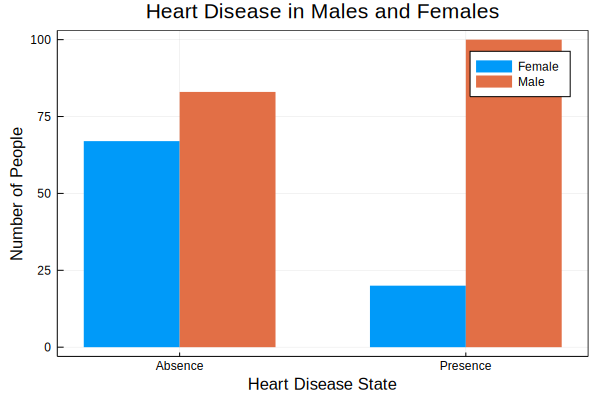

In [128]:
#Create some kind of a side by side comparison of absence/presence vs sex
#Likely a side by side histogram
using StatsPlots

indexAbsence = findall(==(1), y)
indexPresence = findall(==(2), y)

femaleWith = size(findall(==(0.0), sex[indexPresence]))[1]
femaleWithout = size(findall(==(0.0), sex[indexAbsence]))[1]
maleWith = size(findall(==(1.0), sex[indexPresence]))[1]
maleWithout = size(findall(==(1.0), sex[indexAbsence]))[1]


ctg = repeat(["Male", "Female"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 2)

dataMatrix = [maleWithout femaleWithout
              maleWith femaleWith]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Heart Disease State", ylabel = "Number of People",
        title = "Heart Disease in Males and Females", bar_width = 0.67,
        lw = 0, framestyle = :box)


**Observation**
- The Presence of heart disease is significantly higher in males than females. HOWEVER there are 87 Females to 183 males, so the raw data is not entirely indicative of the ratio. We can do a quick calculation to find the ratio in each Sex.

In [129]:
numFemales = femaleWith + femaleWithout
numMales = maleWith + maleWithout

println("Percentage of Females with Presence of Heart Disease = ", femaleWith/numFemales)
println("Percentage of Males with Presence of Heart Disease = ", maleWith/numMales)

Percentage of Females with Presence of Heart Disease = 0.22988505747126436
Percentage of Males with Presence of Heart Disease = 0.546448087431694


**Observation**
- Over Half of all the males in the dataset have the presence of Heart disease, while less than a quarter of females in the dataset have the presence of heart disease. This tells us that Males are definitely at a higher risk than Females.

## Age

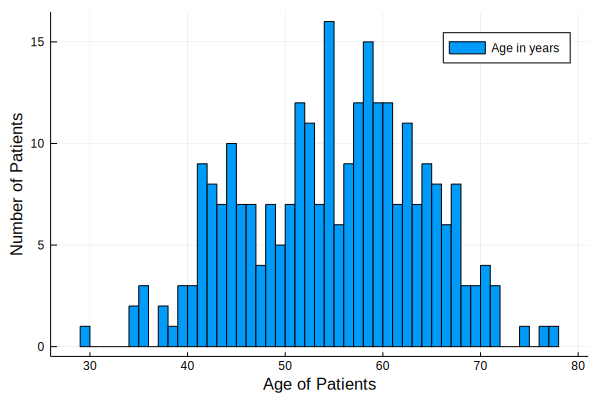

In [130]:
# Plot Histogram
Plots.histogram(df[!, :Age],
                bins = 50, xlabel = "Age of Patients",
                            labels = "Age in years",
                            ylabel = "Number of Patients")

**Observation**
- The majority of the patients are between 40 and 70 years old. This matches with the mean of 54 and the median of 55 that we discovered earlier.

In [131]:
y

270-element Vector{Int64}:
 2
 1
 2
 1
 1
 1
 2
 2
 2
 2
 1
 1
 1
 ⋮
 2
 1
 1
 2
 2
 1
 2
 1
 1
 1
 1
 2

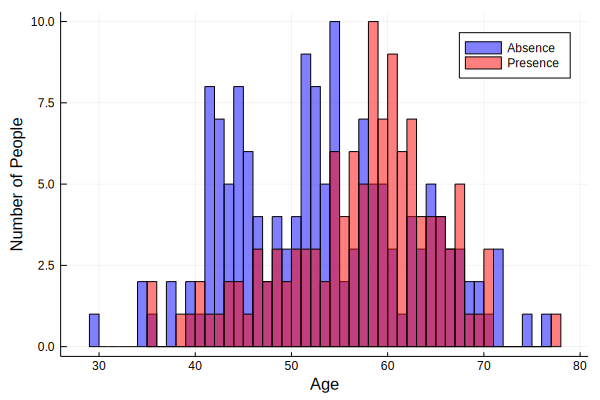

In [132]:
#Get all the indexes of heart disease, and plot their age against the absence or presence of heart disease
indexAbsence = findall(==(1), y)
indexPresence = findall(==(2), y)

#These indexes can be used in the data matrix to get the age value for each row
age = df[:, :Age]
age


#Create some kind of a side by side comparison of absence/presence vs age
#Likely a side by side histogram
StatsPlots.histogram(Any[age[indexAbsence], age[indexPresence]], fillcolor=[:blue :red], fillalpha=0.5, labels=["Absence" "Presence"], 
            xlabel="Age", ylabel="Number of People", bins=50)


**Observation**
- Before the age of 55, there are far more people WITHOUT the presence of heart disease than WITH the presence of heart disease. After the age of 55, this switches to far more people WITH the presence of heart disease than WITHOUT.
- We should note that there are 150 people in the dataset WITHOUT the presence of heart disease, and 120 WITH the presence of heart disease.

## Chest Pain
Next let's compare chest pain to Absence and Presence.
In the Statlog dataset, Chest pain types are defined as:
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic

In [133]:
#Code to get the number of people of each Chest Pain Type
chestPain = df[:, :ChestPainType]
numUnique = unique(chestPain)
d=Dict([(i,count(x->x==i,chestPain)) for i in numUnique])

Dict{Float64, Int64} with 4 entries:
  4.0 => 129
  2.0 => 42
  3.0 => 79
  1.0 => 20

So we have in our dataset:
- 20 of Type 1
- 42 of Type 2
- 79 of Type 3
- 129 of Type 4

Lets Visualize this for ease of observation

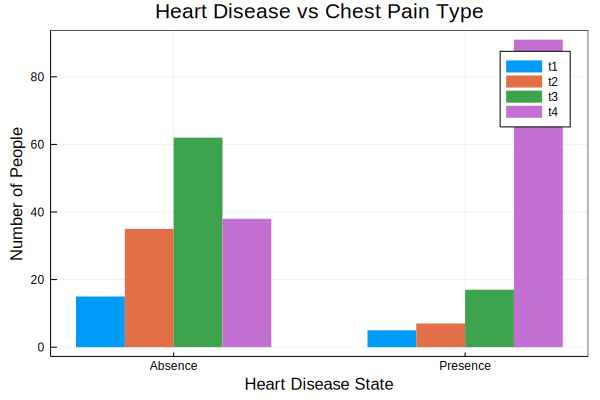

In [134]:
indexAbsence = findall(==(1), y)
indexPresence = findall(==(2), y)

t1With = size(findall(==(1.0), chestPain[indexPresence]))[1]
t1Without = size(findall(==(1.0), chestPain[indexAbsence]))[1]
t2With = size(findall(==(2.0), chestPain[indexPresence]))[1]
t2Without = size(findall(==(2.0), chestPain[indexAbsence]))[1]
t3With = size(findall(==(3.0), chestPain[indexPresence]))[1]
t3Without = size(findall(==(3.0), chestPain[indexAbsence]))[1]
t4With = size(findall(==(4.0), chestPain[indexPresence]))[1]
t4Without = size(findall(==(4.0), chestPain[indexAbsence]))[1]


ctg = repeat(["t1", "t2", "t3", "t4"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 4)

dataMatrix = [t1Without t2Without t3Without t4Without
              t1With t2With t3With t4With]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Heart Disease State", ylabel = "Number of People",
        title = "Heart Disease vs Chest Pain Type", bar_width = 0.67,
        lw = 0, framestyle = :box)


**Observation**
Again, t4 appears to heavily correlate with the presence of heart disease, however it is also the most common amongst all people in the dataset, so better that we look at the ratios.

In [135]:
numt1 = t1With + t1Without
numt2 = t2With + t2Without
numt3 = t3With + t3Without
numt4 = t4With + t4Without

println("Percentage of t1 with Presence of Heart Disease = ", t1With/numt1)
println("Percentage of t2 with Presence of Heart Disease = ", t2With/numt2)
println("Percentage of t3 with Presence of Heart Disease = ", t3With/numt3)
println("Percentage of t4 with Presence of Heart Disease = ", t4With/numt4)

Percentage of t1 with Presence of Heart Disease = 0.25
Percentage of t2 with Presence of Heart Disease = 0.16666666666666666
Percentage of t3 with Presence of Heart Disease = 0.21518987341772153
Percentage of t4 with Presence of Heart Disease = 0.7054263565891473


**Findings**
- t4 has the overall highest percentage of heart disease being present at 70 percent, within that chest pain type.
- It is also worth noting however, that t1 has the second highest at 25 percent, which we would not have seen by simply looking at the numbers as it also is the smallest sample size.

## Resting Blood Pressure
Resting blood pressure (in mm Hg on admission to the hospital)

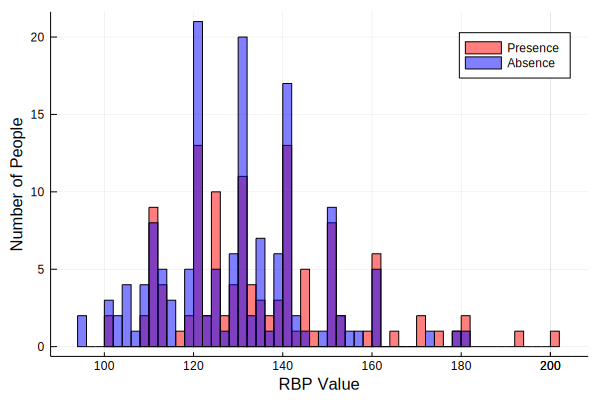

In [136]:
#Code to get the Resting blood pressure of each person
rbp = df[:, :RestingBloodPressure]
rbpWith = rbp[indexPresence]
rbpWithout = rbp[indexAbsence]



#Create some kind of a side by side comparison of absence/presence vs Resting Blood Pressure
StatsPlots.histogram(Any[rbpWith, rbpWithout], fillcolor=[:red :blue], fillalpha=0.5, labels=["Presence" "Absence"], 
            xlabel="RBP Value", ylabel="Number of People", bins=50)


**Findings**
- The distribution of RBP values seems to be similar for both the presence and absence of heart disease. This may mean that this attribute doesn't significantly contribute to the presence of heart disease on its own.

## Cholesterol
Cholesterol: serum cholestoral in mg/dl (Milligrams per Decilitre)

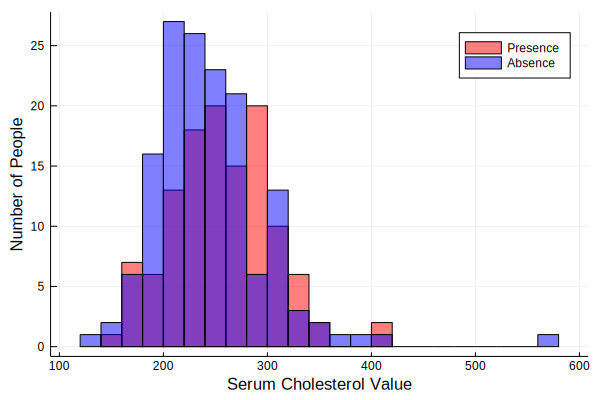

In [137]:
#Code to get the cholesterol of each person
scl = df[:, :SerumCholesterol]
sclWith = scl[indexPresence]
sclWithout = scl[indexAbsence]

#Create some kind of a side by side comparison of absence/presence vs Serum Cholesterol
StatsPlots.histogram(Any[sclWith, sclWithout], fillcolor=[:red :blue], fillalpha=0.5, labels=["Presence" "Absence"], 
            xlabel="Serum Cholesterol Value", ylabel="Number of People", bins=20)

**Findings**
- The distribution of Serum Cholesterol values seems to be similar for both the presence and absence of heart disease. This may mean that this attribute doesn't significantly contribute to the presence of heart disease on its own.

## Fasting Blood Sugar
- fasting blood sugar > 120 mg/dl
- Is the patient's Fasting Blood Sugar above 120 Milligrams per Decilitre?
- 1.0 = true; 0.0 = false

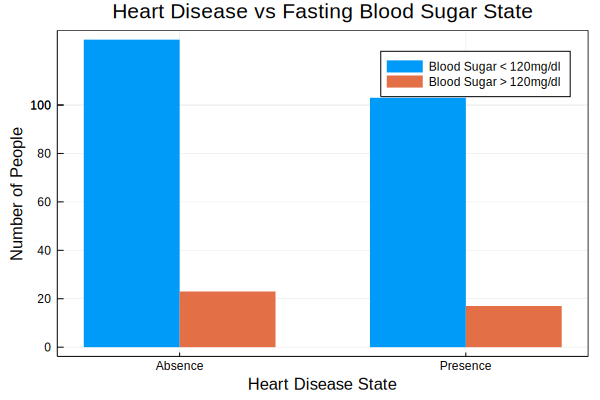

In [138]:
#Code to get the Fasting Blood Sugar state of each person
fbs = df[:, :FastingBloodSugarGreaterThan12mg]
fbsWith = fbs[indexPresence]
fbsWithout = fbs[indexAbsence]


fbsPosWith = size(findall(==(1.0), fbs[indexPresence]))[1]
fbsPosWithout = size(findall(==(1.0), fbs[indexAbsence]))[1]
fbsNegWith = size(findall(==(0.0), fbs[indexPresence]))[1]
fbsNegWithout = size(findall(==(0.0), fbs[indexAbsence]))[1]

ctg = repeat(["Blood Sugar > 120mg/dl", "Blood Sugar < 120mg/dl"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 2)

dataMatrix = [fbsPosWithout fbsNegWithout
              fbsPosWith fbsNegWith]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Heart Disease State", ylabel = "Number of People",
        title = "Heart Disease vs Fasting Blood Sugar State", bar_width = 0.67,
        lw = 0, framestyle = :box)

**Findings**
- There doesn't appear to be a major difference between the Blood Sugar levels in the patients with Heart Disease and the patients without Heart Disease. Let's take a look at the actual ratios:

In [139]:
numPos = fbsPosWith + fbsPosWithout
numNeg = fbsNegWith + fbsNegWithout


println("Percentage of FBS > 120mg/dl with Presence of Heart Disease = ", fbsPosWith/numPos)
println("Percentage of FBS < 120mg/dl with Presence of Heart Disease = ", fbsNegWith/numNeg)

Percentage of FBS > 120mg/dl with Presence of Heart Disease = 0.425
Percentage of FBS < 120mg/dl with Presence of Heart Disease = 0.44782608695652176


**Further Findings**
- On closer inspection, there doesn't appear to be any association between the fasting blood sugar levels being above or below 120mg/dc, and the absence or presence of Heart Disease.

## Resting Electrocardiographic Results
We Have 3 Types:
- Value 0.0: normal
- Value 1.0: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2.0: showing probable or definite left ventricular hypertrophy by Estes' criteria

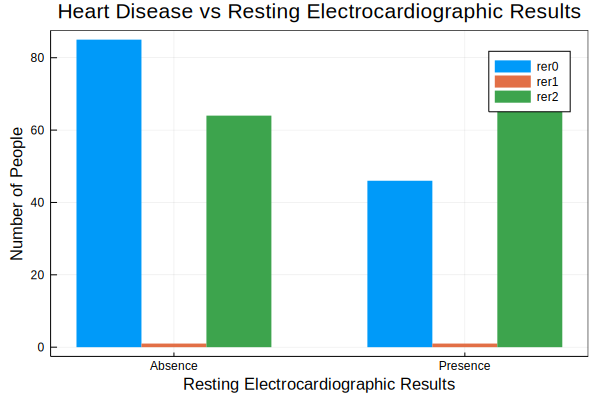

In [140]:
#Code to get the Resting Electrocardiographic Results of each person
rer = df[:, :RestingElectrocardiographicResults]
rerWith = rer[indexPresence]
rerWithout = rer[indexAbsence]

rer0With = size(findall(==(0.0), rer[indexPresence]))[1]
rer0Without = size(findall(==(0.0), rer[indexAbsence]))[1]
rer1With = size(findall(==(1.0), rer[indexPresence]))[1]
rer1Without = size(findall(==(1.0), rer[indexAbsence]))[1]
rer2With = size(findall(==(2.0), rer[indexPresence]))[1]
rer2Without = size(findall(==(2.0), rer[indexAbsence]))[1]
# println(rer0With)
# println(rer1With)
# println(rer2With)
# println(rer0Without)
# println(rer1Without)
# println(rer2Without)



ctg = repeat(["rer0", "rer1", "rer2"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 3)

dataMatrix = [rer0Without rer1Without rer2Without
              rer0With rer1With rer2With]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Resting Electrocardiographic Results", ylabel = "Number of People",
        title = "Heart Disease vs Resting Electrocardiographic Results", bar_width = 0.67,
        lw = 0, framestyle = :box)

**Findings**
- The data appears to show that if you are showing probable or definite left ventricular hypertrophy by Estes' criteria then you are more likely to have the presence of Heart Disease than if you had a normal Resting Electrocardiographic Result.
- We don't have enough data to comment on ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) as only two people in the dataset have this.

In [141]:
numRer0 = rer0With + rer0Without
numRer1 = rer1With + rer1Without
numRer2 = rer2With + rer2Without

println("Percentage of rer1 with Presence of Heart Disease = ", rer0With/numRer0)
println("Percentage of rer2 with Presence of Heart Disease = ", rer1With/numRer1)
println("Percentage of rer3 with Presence of Heart Disease = ", rer2With/numRer2)

Percentage of rer1 with Presence of Heart Disease = 0.3511450381679389
Percentage of rer2 with Presence of Heart Disease = 0.5
Percentage of rer3 with Presence of Heart Disease = 0.5328467153284672


**Further Findings**
- The ratios above back up the findings that if you are showing probable or definite left ventricular hypertrophy by Estes' criteria (rer2) then you are more likely to have the presence of Heart Disease than if you had a normal Resting Electrocardiographic Result (rer0) as people in the rer2 group have over a 50 percent likelihood of Heart Disease being present.

## Maximum Heart Rate Achieved
The maximum heart rate achieved by the patient  (During a specific exercise??????????)


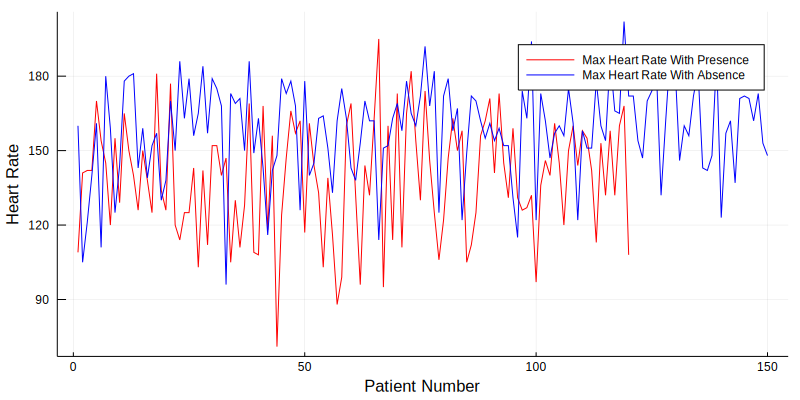

In [142]:
#Code to get the Max Heart Rate of each person
hr = df[:, :MaximumHeartRateAchieved]
hrWith = hr[indexPresence]
hrWithout = hr[indexAbsence]


# plot them out
Plots.plot(hrWith, label="Max Heart Rate With Presence", xlabel = "Patient Number",
    ylabel = "Heart Rate",size=(800, 400), color="red")
Plots.plot!(hrWithout, label="Max Heart Rate With Absence", color="blue", size=(800, 400))



**Observations**
Visually, it appears as if those with the presence of heart disease have a lower max heart rate achieved than those without the presence of heart disease. We can verify this by checking the overall average.

In [143]:
using Statistics

println("Average Max Heart Rate Achieved for people with the presence of heart disease = ", Statistics.mean(hrWith))
println("Average Max Heart Rate Achieved for people without the presence of heart disease = ", Statistics.mean(hrWithout))



Average Max Heart Rate Achieved for people with the presence of heart disease = 138.85833333333332
Average Max Heart Rate Achieved for people without the presence of heart disease = 158.33333333333334


**Findings**
The average max heart rate achieved is indeed higher for those without the presence of heart disease. Which is what we would expect.

## Exercise Induced Angina
Does the patient have exercise induced angina (1.0 = yes; 0.0 = no)

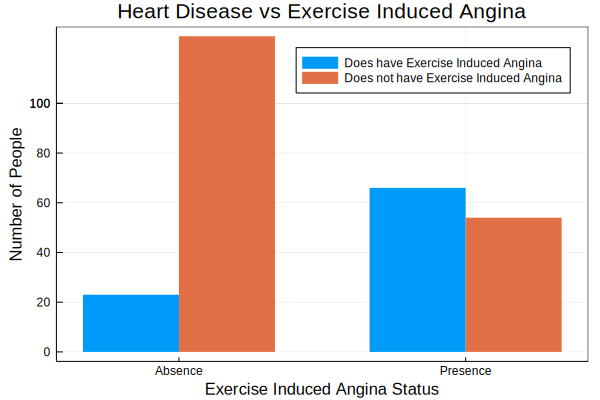

In [144]:
#Code to get the Resting Electrocardiographic Results of each person
eia = df[:, :ExerciseInducedAngina]
eiaWith = eia[indexPresence]
eiaWithout = eia[indexAbsence]



eiaPosWith = size(findall(==(1.0), eiaWith))[1]
eiaPosWithout = size(findall(==(1.0), eiaWithout))[1]
eiaNegWith = size(findall(==(0.0), eiaWith))[1]
eiaNegWithout = size(findall(==(0.0), eiaWithout))[1]
# println(eiaPosWith)
# println(eiaPosWithout)
# println(eiaNegWith)
# println(eiaNegWithout)


ctg = repeat(["Does have Exercise Induced Angina", "Does not have Exercise Induced Angina"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 2)

dataMatrix = [eiaPosWithout eiaNegWithout
              eiaPosWith eiaNegWith]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Exercise Induced Angina Status", ylabel = "Number of People",
        title = "Heart Disease vs Exercise Induced Angina", bar_width = 0.67,
        lw = 0, framestyle = :box)


**Observations**
The proportion of those without Exercise Induced Angina appears to be much larger in those without the presence of heart disease. We can check these side by side to see the actual values.

In [145]:
absence = eiaPosWithout + eiaNegWithout
presence = eiaPosWith + eiaNegWith

println("Ratio of Excercise Induced Angina in those without the presence of Heart Disease = ", eiaPosWithout/absence,
        " WithoutEIA : ", eiaNegWithout/absence, " WithEIA")
println("Ratio of Excercise Induced Angina in those with the presence of Heart Disease = ", eiaPosWith/presence,
        " WithoutEIA : ", eiaNegWith/presence, " WithEIA")

Ratio of Excercise Induced Angina in those without the presence of Heart Disease = 0.15333333333333332 WithoutEIA : 0.8466666666666667 WithEIA
Ratio of Excercise Induced Angina in those with the presence of Heart Disease = 0.55 WithoutEIA : 0.45 WithEIA


**Findings**

These values show that there is a much larger percentage of people who have Exercise Induced Angina within those who have the presence of heart disease vs those who do not have the presence of heart disease

## Old Peak
oldpeak = ST depression induced by exercise relative to rest

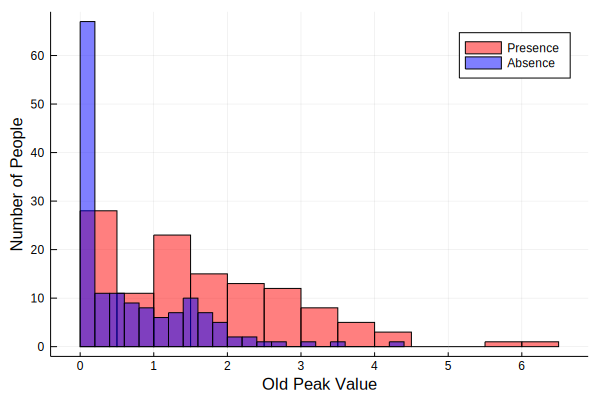

In [146]:
#Code to get the Old Peak Results of each person
op = df[:, :OldPeak]
opWith = op[indexPresence]
opWithout = op[indexAbsence]



#Create some kind of a side by side comparison of absence/presence vs Old Peak
StatsPlots.histogram(Any[opWith, opWithout], fillcolor=[:red :blue], fillalpha=0.5, labels=["Presence" "Absence"], 
            xlabel="Old Peak Value", ylabel="Number of People", bins=20)



**Observations**
- Visually, it looks like more people have higher old peak values when they have the presence of heart disease, we can verify this by checking the average old peak value accross both groups.

In [147]:

println("Average Old Peak value for those with the presence of Heart Disease = ", Statistics.mean(opWith))
println("Average Old Peak value for those without the presence of Heart Disease = ", Statistics.mean(opWithout))

Average Old Peak value for those with the presence of Heart Disease = 1.5841666666666667
Average Old Peak value for those without the presence of Heart Disease = 0.6226666666666667


**Findings**
- The numbers back up what the graph is showing us, those with the presence of heart disease tend to have higher old peak values, so there appears to be a correlation between old peak value and the presence of heart disease.

## Slope of Peak Exercise ST Segment
Taken from the ST segment of the heart wave during peak exercise

slope: the slope of the peak exercise ST segment
- Value 1.0: upsloping
- Value 2.0: flat
- Value 3.0: downsloping

98
32
44
78
8
10


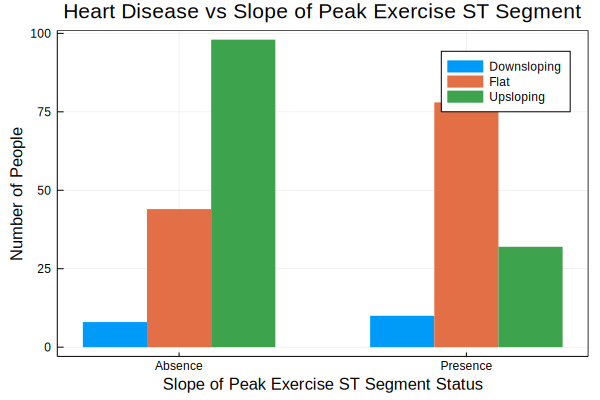

In [148]:
#Code to get the Old Peak Results of each person
slopeST = df[:, :SlopeOfPeakExerciseSTSegment]
slopeSTWith = slopeST[indexPresence]
slopeSTWithout = slopeST[indexAbsence]

#Now we visualize



slopeST1With = size(findall(==(1.0), slopeSTWith))[1]
slopeST1Without = size(findall(==(1.0), slopeSTWithout))[1]
slopeST2With = size(findall(==(2.0), slopeSTWith))[1]
slopeST2Without = size(findall(==(2.0), slopeSTWithout))[1]
slopeST3With = size(findall(==(3.0), slopeSTWith))[1]
slopeST3Without = size(findall(==(3.0), slopeSTWithout))[1]
println(slopeST1Without)
println(slopeST1With)
println(slopeST2Without)
println(slopeST2With)
println(slopeST3Without)
println(slopeST3With)


ctg = repeat(["Upsloping", "Flat", "Downsloping"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 3)

dataMatrix = [slopeST1Without slopeST2Without slopeST3Without
              slopeST1With slopeST2With slopeST3With]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Slope of Peak Exercise ST Segment Status", ylabel = "Number of People",
        title = "Heart Disease vs Slope of Peak Exercise ST Segment", bar_width = 0.67,
        lw = 0, framestyle = :box)


**Observations**
From the graphs, it would appear that there are a high number of people with upsloping ST curves in those without the presence of heart disease, and that there are also a high number of people with flat ST curves in those with the presence of heart disease. We should check the percentages of each.

In [149]:
numSlopeST3 = slopeST3With + slopeST3Without 
println("Ratio of Downsloping ST curve is: ", slopeST3With/numSlopeST3, " with heart disease vs ", 
    slopeST3Without/numSlopeST3, " without heart disease.\n")

numSlopeST2 = slopeST2With + slopeST2Without 
println("Ratio of Flat ST curve is: ", slopeST2With/numSlopeST2, " with heart disease vs ", 
    slopeST2Without/numSlopeST2, " without heart disease.\n")

numSlopeST1 = slopeST1With + slopeST1Without 
println("Ratio of Upsloping ST curve is: ", slopeST1With/numSlopeST1, " with heart disease vs ", 
    slopeST1Without/numSlopeST1, " without heart disease.")


Ratio of Downsloping ST curve is: 0.5555555555555556 with heart disease vs 0.4444444444444444 without heart disease.

Ratio of Flat ST curve is: 0.639344262295082 with heart disease vs 0.36065573770491804 without heart disease.

Ratio of Upsloping ST curve is: 0.24615384615384617 with heart disease vs 0.7538461538461538 without heart disease.


**Findings**
The numbers back up our visual observations, about 64 percent of those with a Flat ST Curve have the presence of heart disease, and about 75 percent of those with an Upsloping ST Curve do not have the presence of heart disease.

## Number of Major Vessels (0-3) Colored by Flourosopy

- Value 1.0: 1 Vessel Coloured
- Value 2.0: 2 Vessels Coloured
- Value 3.0: 3 Vessels Coloured

20
38
7
26
3
16


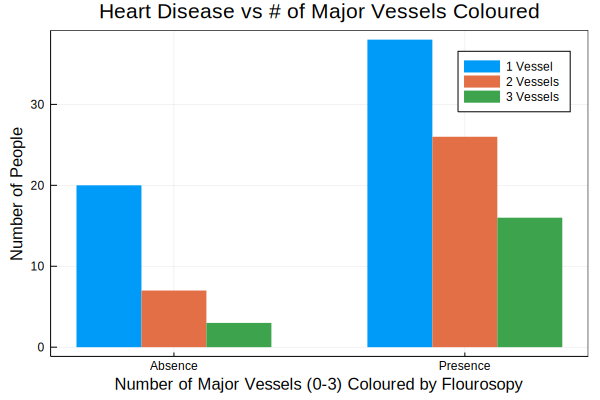

In [150]:
vessels = df[:, :NumMajorVesselsColoredByFlouroscopy]
vWith = vessels[indexPresence]
vWithout = vessels[indexAbsence]

#Now we visualize

v1With = size(findall(==(1.0), vWith))[1]
v1Without = size(findall(==(1.0), vWithout))[1]
v2With = size(findall(==(2.0), vWith))[1]
v2Without = size(findall(==(2.0), vWithout))[1]
v3With = size(findall(==(3.0), vWith))[1]
v3Without = size(findall(==(3.0), vWithout))[1]
println(v1Without)
println(v1With)
println(v2Without)
println(v2With)
println(v3Without)
println(v3With)


ctg = repeat(["1 Vessel", "2 Vessels", "3 Vessels"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 3)

dataMatrix = [v1Without v2Without v3Without
              v1With v2With v3With]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Number of Major Vessels (0-3) Coloured by Flourosopy", ylabel = "Number of People",
        title = "Heart Disease vs # of Major Vessels Coloured", bar_width = 0.67,
        lw = 0, framestyle = :box)

**Observations**
The graphs appear to have about the same distribution of number of vessels coloured over those with heart disease and those without heart disease.

In [151]:
numv1 = v1With + v1Without 
println("Ratio of 1 vessel coloured is: ", v1With/numv1, " with heart disease vs ", 
    v1Without/numv1, " without heart disease.\n")

numv2 = v2With + v2Without 
println("Ratio of 2 vessels coloured is: ", v2With/numv2, " with heart disease vs ", 
    v2Without/numv2, " without heart disease.\n")

numv3 = v3With + v3Without 
println("Ratio of 3 vessels coloured is: ", v3With/numv3, " with heart disease vs ", 
    v3Without/numv3, " without heart disease.\n\n")

numWithout = v1Without + v2Without + v3Without
println("Ratio of Vessel colouring without heart disease is: ", v1Without/numWithout, " with 1 vessel coloured vs ", 
    v2Without/numWithout, " with 2 vessels coloured vs " ,
    v3Without/numWithout, " with 3 vessels coloured.\n")

numWith = v1With + v2With + v3With
println("Ratio of Vessel colouring with heart disease is: ", v1With/numWith, " with 1 vessel coloured vs ", 
    v2With/numWith, " with 2 vessels coloured vs " ,
    v3With/numWith, " with 3 vessels coloured.\n")

Ratio of 1 vessel coloured is: 0.6551724137931034 with heart disease vs 0.3448275862068966 without heart disease.

Ratio of 2 vessels coloured is: 0.7878787878787878 with heart disease vs 0.21212121212121213 without heart disease.

Ratio of 3 vessels coloured is: 0.8421052631578947 with heart disease vs 0.15789473684210525 without heart disease.


Ratio of Vessel colouring without heart disease is: 0.6666666666666666 with 1 vessel coloured vs 0.23333333333333334 with 2 vessels coloured vs 0.1 with 3 vessels coloured.

Ratio of Vessel colouring with heart disease is: 0.475 with 1 vessel coloured vs 0.325 with 2 vessels coloured vs 0.2 with 3 vessels coloured.



**Findings**
It is hard to draw any significant findings from these numbers, as the distribution appears to be similar, with slightly different proportions. Perhaps this attribute does not carry heavy weight that we could use in building a classifier.

## Thal.

Short for Thalassemia - an inherited blood disorder that causes your body to have less hemoglobin than normal.

- Value 3.0: Normal
- Value 6.0: Fixed Defect
- Value 7.0: Reversable Defect

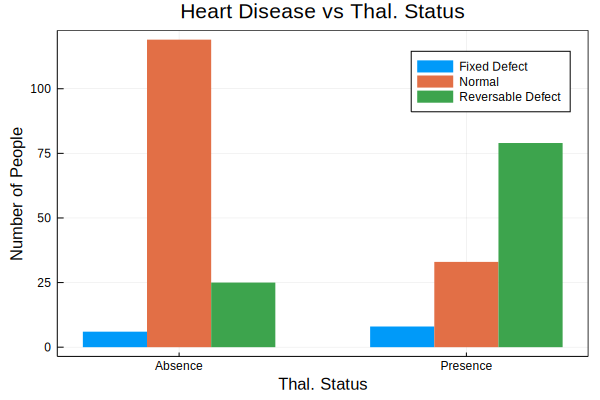

In [152]:
thal = df[:, :Thal]
thalWith = thal[indexPresence]
thalWithout = thal[indexAbsence]

#Now we visualize

thal3With = size(findall(==(3.0), thalWith))[1]
thal3Without = size(findall(==(3.0), thalWithout))[1]
thal6With = size(findall(==(6.0), thalWith))[1]
thal6Without = size(findall(==(6.0), thalWithout))[1]
thal7With = size(findall(==(7.0), thalWith))[1]
thal7Without = size(findall(==(7.0), thalWithout))[1]
# println(thal3Without)
# println(thal3With)
# println(thal6Without)
# println(thal6With)
# println(thal7Without)
# println(thal7With)


ctg = repeat(["Normal", "Fixed Defect", "Reversable Defect"], inner = 2)
nam = repeat(["Absence", "Presence"], outer = 3)

dataMatrix = [thal3Without thal6Without thal7Without
              thal3With thal6With thal7With]

StatsPlots.groupedbar(nam, dataMatrix, group = ctg, xlabel = "Thal. Status", ylabel = "Number of People",
        title = "Heart Disease vs Thal. Status", bar_width = 0.67,
        lw = 0, framestyle = :box)

**Observation**
There appears to be a large number of 'normal' in those without heart disease, which makes sense. In those with the presence of heart disease, there appears to be a large proportion of people with a reversible defect.

In [153]:
numthal3 = thal3With + thal3Without
println("Ratio of 'Normal' is: ", thal3With/numthal3, " with heart disease vs ", 
    thal3Without/numthal3, " without heart disease.\n")

numthal6 = thal6With + thal6Without
println("Ratio of 'Fixed Defect' is: ", thal6With/numthal6, " with heart disease vs ", 
    thal6Without/numthal6, " without heart disease.\n")

numthal7 = thal7With + thal7Without
println("Ratio of 'Reversible Defect' is: ", thal7With/numthal7, " with heart disease vs ", 
    thal7Without/numthal7, " without heart disease.\n\n")

numWithout = thal3Without + thal6Without + thal7Without
println("Ratio of thal without heart disease is: ", thal3Without/numWithout, " with 'Normal' vs ", 
    thal6Without/numWithout, " with 'Fixed Defect' vs " ,
    thal7Without/numWithout, " with 'Reversible Defect'.\n")

numWith = thal3With + thal6With + thal7With
println("Ratio of thal with heart disease is: ", thal3With/numWith, " with 'Normal' vs ", 
    thal6With/numWith, " with 'Fixed Defect' vs " ,
    thal7With/numWith, " with 'Reversible Defect'.\n")

Ratio of 'Normal' is: 0.21710526315789475 with heart disease vs 0.7828947368421053 without heart disease.

Ratio of 'Fixed Defect' is: 0.5714285714285714 with heart disease vs 0.42857142857142855 without heart disease.

Ratio of 'Reversible Defect' is: 0.7596153846153846 with heart disease vs 0.2403846153846154 without heart disease.


Ratio of thal without heart disease is: 0.7933333333333333 with 'Normal' vs 0.04 with 'Fixed Defect' vs 0.16666666666666666 with 'Reversible Defect'.

Ratio of thal with heart disease is: 0.275 with 'Normal' vs 0.06666666666666667 with 'Fixed Defect' vs 0.6583333333333333 with 'Reversible Defect'.



**Findings**
- As expected, a Normal thal status (we are assuming this to mean 'someone who does not have thalessemia') has a high proportion of people who do not have the presence of heart disease, while this is much lower in those with the presence of heart disease.
- We also note that there is a high proportion of people who have a 'Reversible Defect' status who have the presence of heart disease.
- These values indicate that this attribute may be helpful to us when building our classifier.

# Model Building and Classification

- Feature analysis and selection -> In Progress
- Ensembles -> In Progress

# Feature Selection

- We cannot do PCA because the features we selected to be relevant are not all continuous, therefore PCA would be innappropriate.
- We cannot use Pearson Correlation because our target is non-numerical -> Our target is categorical.
- We cannot use A Linear Regressor since the dependent variable is not continuous.



- Mutual Information is useful for both categorical and numeric output and input, so is probably a good method for feature selection.



- CURRENT PLAN
- Decision tree like the iris dataset
- Ensemble using the random forest
- logistic regressor
- SVM

## Data Normalization

Data normalization is necesssary becuase our data variables have diffrent ranges. This is an issue becuase larger ranged variables will have a larger impact on our models, even if there predictive influence is not as important. When we look at the min, mean, and max values of our data set, this variance is clear to see:


In [154]:
describe(df)

,variable,mean,min,median,max,nunique,nmissing
,Symbol,Float64,Real,Float64,Real,Nothing,Nothing
1,Age,54.4333,29.0,55.0,77.0,,
2,Sex,0.677778,0.0,1.0,1.0,,
3,ChestPainType,3.17407,1.0,3.0,4.0,,
4,RestingBloodPressure,131.344,94.0,130.0,200.0,,
5,SerumCholesterol,249.659,126.0,245.0,564.0,,
6,FastingBloodSugarGreaterThan12mg,0.148148,0.0,0.0,1.0,,
7,RestingElectrocardiographicResults,1.02222,0.0,2.0,2.0,,
8,MaximumHeartRateAchieved,149.678,71.0,153.5,202.0,,
9,ExerciseInducedAngina,0.32963,0.0,0.0,1.0,,


In [155]:
# The code to normalise the data

using Printf, Plots, MLJ
transformer_instance = Standardizer()
transformer_model = machine(transformer_instance, df)
MLJ.fit!(transformer_model)
norm_data = MLJ.transform(transformer_model, df);
describe(norm_data)

┌ Info: Training Machine{Standardizer,…} @516.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


,variable,mean,min,median,max
,Symbol,Float64,Real,Float64,Real
1,Age,3.89812e-16,-2.79209,0.0622091,2.47739
2,Sex,-7.31925e-17,-1.44764,0.688222,0.688222
3,ChestPainType,-1.0691e-17,-2.28828,-0.183219,0.869313
4,RestingBloodPressure,5.55112e-16,-2.09077,-0.0752701,3.84375
5,SerumCholesterol,-2.56585e-16,-2.3925,-0.0901451,6.08171
6,FastingBloodSugarGreaterThan12mg,3.24843e-17,-0.416256,-0.416256,2.39347
7,RestingElectrocardiographicResults,1.21713e-16,-1.02438,0.979844,0.979844
8,MaximumHeartRateAchieved,1.97373e-17,-3.3963,0.164995,2.25861
9,ExerciseInducedAngina,-2.46716e-17,-0.699923,-0.699923,1.42344


# Using our chosen features to build models
- The features we choose are:
    - Sex
    - Age                  
    - Chest Pain Type
    - RestingElectrocardiographicResults	
    - Max Heart Rate Achieved              
    - Exercise Induced Angina
    - Old Peak                  
    - Slope of ST Curve
    - Thal
    
- Let's make a new Data Matrix with only these features, and a truth vector

In [156]:
newdf = df[:, ["Sex", "Age", "ChestPainType", "RestingElectrocardiographicResults", "MaximumHeartRateAchieved",
        "ExerciseInducedAngina", "OldPeak", "SlopeOfPeakExerciseSTSegment", "Thal"]]

,Sex,Age,ChestPainType,RestingElectrocardiographicResults,MaximumHeartRateAchieved
,Float64,Float64,Float64,Float64,Float64
1,1.0,70.0,4.0,2.0,109.0
2,0.0,67.0,3.0,2.0,160.0
3,1.0,57.0,2.0,0.0,141.0
4,1.0,64.0,4.0,0.0,105.0
5,0.0,74.0,2.0,2.0,121.0
6,1.0,65.0,4.0,0.0,140.0
7,1.0,56.0,3.0,2.0,142.0
8,1.0,59.0,4.0,2.0,142.0
9,1.0,60.0,4.0,2.0,170.0


# Data Manipulation
- Create a NamedTuple so that we can create a decision tree the same way that we did in Lab6 with the Iris Data Set

In [157]:
# We can normalize the data here. We will now have the original dataset, and the normalised data_set
# code for standardizing the data: newdf
using Printf, Plots
transformer_instance = Standardizer()
transformer_model = machine(transformer_instance, newdf)
MLJ.fit!(transformer_model)
norm_data = MLJ.transform(transformer_model, newdf);
describe(norm_data)

# Are the orginal data
newdf = df[:, ["Sex", "Age", "ChestPainType", "RestingElectrocardiographicResults", "MaximumHeartRateAchieved",
        "ExerciseInducedAngina", "OldPeak", "SlopeOfPeakExerciseSTSegment", "Thal"]]

ourData = (Sex=df[:, :Sex], Age=df[:, :Age], ChestPainType=df[:, :ChestPainType], 
    RestingElectrocardiographicResults=df[:, :RestingElectrocardiographicResults], 
    MaximumHeartRateAchieved=df[:, :MaximumHeartRateAchieved], 
    ExerciseInducedAngina=df[:, :ExerciseInducedAngina],
    OldPeak=df[:, :OldPeak], SlopeOfPeakExerciseSTSegment=df[:, :SlopeOfPeakExerciseSTSegment], 
    Thal=df[:, :Thal])

#The changed data
# Are the orginal data
norm_newdf = norm_data[:, ["Sex", "Age", "ChestPainType", "RestingElectrocardiographicResults", "MaximumHeartRateAchieved",
        "ExerciseInducedAngina", "OldPeak", "SlopeOfPeakExerciseSTSegment", "Thal"]]

norm_ourData = (Sex=norm_data[:, :Sex], Age=norm_data[:, :Age], ChestPainType=norm_data[:, :ChestPainType], 
    RestingElectrocardiographicResults=norm_data[:, :RestingElectrocardiographicResults], 
    MaximumHeartRateAchieved=norm_data[:, :MaximumHeartRateAchieved], 
    ExerciseInducedAngina=norm_data[:, :ExerciseInducedAngina],
    OldPeak=norm_data[:, :OldPeak], SlopeOfPeakExerciseSTSegment=norm_data[:, :SlopeOfPeakExerciseSTSegment], 
    Thal=norm_data[:, :Thal])

┌ Info: Training Machine{Standardizer,…} @417.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


(Sex = [0.6882216640697679, -1.4476386726984776, 0.6882216640697679, 0.6882216640697679, -1.4476386726984776, 0.6882216640697679, 0.6882216640697679, 0.6882216640697679, 0.6882216640697679, -1.4476386726984776  …  -1.4476386726984776, 0.6882216640697679, 0.6882216640697679, 0.6882216640697679, 0.6882216640697679, 0.6882216640697679, 0.6882216640697679, -1.4476386726984776, 0.6882216640697679, 0.6882216640697679],
 Age = [1.708920077137053, 1.3795778781170642, 0.28177054805043517, 1.0502356790970755, 2.1480430091637044, 1.1600164121037384, 0.17198981504377225, 0.5013320140637609, 0.6111127470704238, 0.9404549460904126  …  0.3915512810570981, 0.6111127470704238, 0.3915512810570981, -0.5964753160028681, -0.706256049009531, -0.2671331169828794, -1.1453789810361825, 0.17198981504377225, 0.28177054805043517, 1.3795778781170642],
 ChestPainType = [0.8693133244601335, -0.1832185033615528, -1.2357503311832392, 0.8693133244601335, -1.2357503311832392, 0.8693133244601335, -0.1832185033615528, 0.8

# Decision Tree
- 

In [158]:
#import Pkg; Pkg.add("DecisionTree")
#Pkg.add("MLJDecisionTreeInterface")
#import Pkg; Pkg.add("CategoricalArrays")

using MLJ, CategoricalArrays



Tree = @load DecisionTreeClassifier pkg=DecisionTree

tree = Tree()

#To run this section with the non-normalised data, uncomment the next line, and comment out the following line
#X1 = ourData
X1 = norm_ourData

#Make a categorical Array
CAy = CategoricalArray(y)

#Make the Training and the test indices
using Random
Random.seed!(1)
tr_inds, te_inds = partition(1:nrows(X1), 0.7, shuffle=true)

#Create the machine using the model and the data
mach = machine(tree, X1, CAy)
MLJ.fit!(mach, rows=tr_inds)

#Check out the training performance
ypred = predict_mode(mach, rows=tr_inds)
predictionAccuracyTraining = accuracy(ypred, CAy[tr_inds])

#Check out the testing performance
ypred = predict_mode(mach, rows=te_inds)
predictionAccuracyTest = accuracy(ypred, CAy[te_inds])

println("Accuracy of Training Prediction = ", predictionAccuracyTraining)
println("Accuracy of Testing Prediction = ", predictionAccuracyTest)

import MLJDecisionTreeInterface ✔
Accuracy of Training Prediction = 1.0
Accuracy of Testing Prediction = 0.7901234567901234


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\CMRL\.julia\packages\MLJModels\E8BbE\src\loading.jl:168
┌ Info: Training Machine{DecisionTreeClassifier,…} @985.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


There seems a mismatch between the two. In case we might overfit, let's try a tree with limited depth:

In [159]:
tree = Tree(max_depth=3)
mach = machine(tree, X1, CAy)
MLJ.fit!(mach, rows=tr_inds)
println("Tr. accu.=", accuracy(predict_mode(mach, rows=tr_inds), CAy[tr_inds]))
println("Te. accu.=", accuracy(predict_mode(mach, rows=te_inds), CAy[te_inds]))

Tr. accu.=0.8412698412698413
Te. accu.=0.7777777777777778


┌ Info: Training Machine{DecisionTreeClassifier,…} @067.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


Let's check out a range of depths

┌ Info: Training Machine{DecisionTreeClassifier,…} @350.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @488.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @835.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @795.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @384.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @429.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @965.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{DecisionTreeClassifier,…} @636.
└ @ MLJBase 

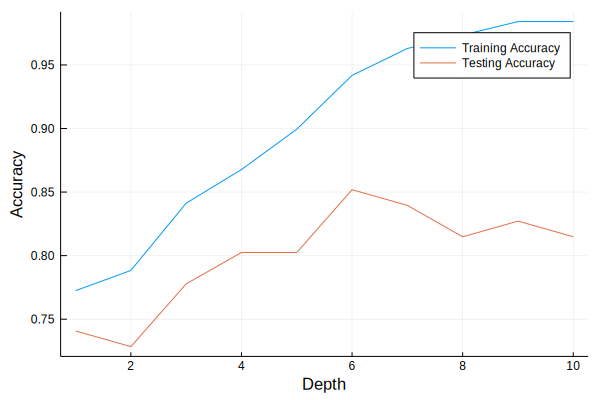

In [160]:
using Plots

tr_acc = Float64[]
te_acc = Float64[]

for i = 1:10
    tree = Tree(max_depth=i)
    mach = machine(tree, X1, CAy)
    MLJ.fit!(mach, rows=tr_inds)
#     println("Tr. accu.=", accuracy(predict_mode(mach, rows=tr_inds), CAy[tr_inds]))
#     println("Te. accu.=", accuracy(predict_mode(mach, rows=te_inds), CAy[te_inds]))
    ypred_tr = predict_mode(mach, rows=tr_inds)
    ypred_te = predict_mode(mach, rows=te_inds)
    
    push!(tr_acc, accuracy(ypred_tr, CAy[tr_inds]))
    push!(te_acc, accuracy(ypred_te, CAy[te_inds]))
end

Plots.plot(tr_acc, xlabel="Depth", ylabel="Accuracy", label="Training Accuracy")
Plots.plot!(te_acc, xlabel="Depth", ylabel="Accuracy", label="Testing Accuracy")

This looks like a depth of 6 or 7 will give us the best accuracy for our test indices

In [161]:
tree = Tree(max_depth=6)
mach = machine(tree, X1, CAy)
MLJ.fit!(mach, rows=tr_inds)
println("Tr. accu.=", accuracy(predict_mode(mach, rows=tr_inds), CAy[tr_inds]))
println("Te. accu.=", accuracy(predict_mode(mach, rows=te_inds), CAy[te_inds]))

Tr. accu.=0.9417989417989419
Te. accu.=0.8518518518518519


┌ Info: Training Machine{DecisionTreeClassifier,…} @125.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


## Cross validation for tree model

In [162]:
cv=CV(nfolds=10)
tree = Tree(max_depth=6)
perf = evaluate(tree, X1, CAy, resampling=cv, measure=auc, verbosity=0)

┌─────────────────────┬───────────────┬─────────────────────────────────────────
│ _.measure           │ _.measurement │ _.per_fold                             ⋯
├─────────────────────┼───────────────┼─────────────────────────────────────────
│ AreaUnderCurve @330 │ 0.78          │ [0.771, 0.731, 0.724, 0.868, 0.896, 0. ⋯
└─────────────────────┴───────────────┴─────────────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


**Observations**
- We did not check the difference between the normalized data and the normal data for decision tree, due to them being unaffected by normalization.
- The Area under the curve is 78 percent, which is considered average. We hope to get better results with other classifiers.

**Confusion matrix**

In [163]:
ypred = predict_mode(mach, rows=te_inds)
ConfusionMatrix()(ypred, CAy[te_inds])

┌ Warning: The classes are un-ordered,
│ using: negative='1' and positive='2'.
│ To suppress this warning, consider coercing to OrderedFactor.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\measures\confusion_matrix.jl:94


              ┌───────────────────────────┐
              │       Ground Truth        │
┌─────────────┼─────────────┬─────────────┤
│  Predicted  │      1      │      2      │
├─────────────┼─────────────┼─────────────┤
│      1      │     37      │      7      │
├─────────────┼─────────────┼─────────────┤
│      2      │      5      │     32      │
└─────────────┴─────────────┴─────────────┘


┌ Info: Training Machine{DecisionTreeClassifier,…} @397.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


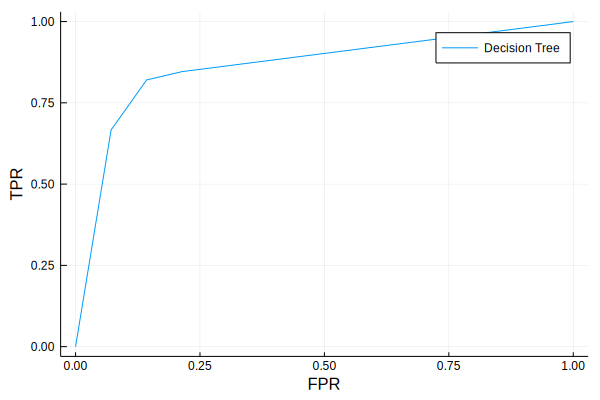

In [164]:
#Plotting the ROC-AUC curve for each model being iterated
clf = machine(Tree(max_depth=6), norm_ourData, CAy)
MLJ.fit!(clf, rows=tr_inds)
y_pred= MLJ.predict(clf, rows=te_inds)


fprs, tprs, thresholds = MLJ.roc(y_pred, CAy[te_inds])
Plots.plot(fprs, tprs, label="Decision Tree", xlabel="FPR", ylabel="TPR")


In [165]:
auc_roc = auc(y_pred, y[te_inds])

0.8626373626373627

In [166]:
y_pred

81-element MLJBase.UnivariateFiniteVector{Multiclass{2}, Int64, UInt32, Float64}:
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.0, 2=>1.0)
 UnivariateFinite{Multiclass{2}}(1=>0.0, 2=>1.0)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.333, 2=>0.667)
 UnivariateFinite{Multiclass{2}}(1=>0.0, 2=>1.0)
 UnivariateFinite{Multiclass{2}}(1=>0.333, 2=>0.667)
 UnivariateFinite{Multiclass{2}}(1=>0.0, 2=>1.0)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.333, 2=>0.667)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 ⋮
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.857, 2=>0.143)
 UnivariateFinite{Multiclass{2}}(1=>0.333, 2=>0.667)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFi

**Note**
- The AUC_ROC is different when using the method above, than when using the cross validation method. We honestly don't know why this is the case. But going off of the above value, our classifer has an AUC of 86.2 percent, which is considered to be good.

# Support Vector Machine

In [167]:
#import Pkg; Pkg.add("MLJLIBSVMInterface")
#import Pkg; Pkg.add("LIBSVM")

In [168]:
SVC = @load SVC pkg=LIBSVM

import MLJLIBSVMInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\CMRL\.julia\packages\MLJModels\E8BbE\src\loading.jl:168


MLJLIBSVMInterface.SVC

In [169]:
@load SVC pkg=LIBSVM; 
using LIBSVM

svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(5));

import MLJLIBSVMInterface ✔


┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\CMRL\.julia\packages\MLJModels\E8BbE\src\loading.jl:168


Create SVC machine, train on data and print training and testing accuracy

In [170]:
svc_mach = machine(svc_model, X1, CAy)
MLJ.fit!(svc_mach) #, rows=tr_inds, verbosity=0)
MLJ.predict(svc_mach, rows=te_inds)


println("Tr. accu.=", accuracy(MLJ.predict(svc_mach, rows=tr_inds), CAy[tr_inds]))
println("Te. accu.=", accuracy(MLJ.predict(svc_mach, rows=te_inds), CAy[te_inds]))

Tr. accu.=0.8941798941798942


┌ Info: Training Machine{SVC,…} @544.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


Te. accu.=0.9012345679012346


Run chart showing SVC with polynomial kernel degrees varying from 1 to 10.

┌ Info: Training Machine{SVC,…} @777.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @494.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @635.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @430.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @511.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @399.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @168.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @520.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @469.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\

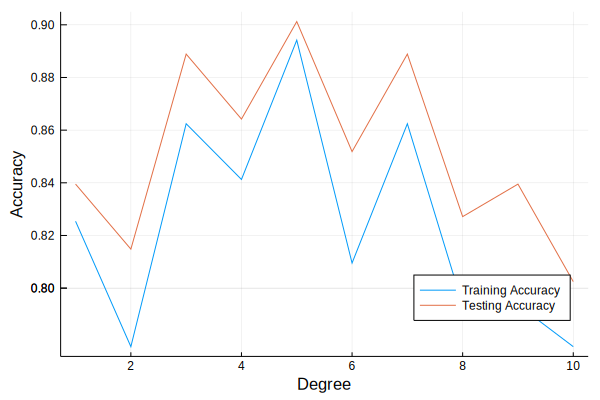

In [171]:
tr_acc = Float64[]
te_acc = Float64[]

for i = 1:10
    svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(i));
    svc_mach = machine(svc_model, X1, CAy)
    MLJ.fit!(svc_mach) #, rows=tr_inds, verbosity=0)
#     println("Tr. accu.=", accuracy(predict_mode(mach, rows=tr_inds), y[tr_inds]))
#     println("Te. accu.=", accuracy(predict_mode(mach, rows=te_inds), y[te_inds]))
    ypred_tr = MLJ.predict(svc_mach, rows=tr_inds)
    ypred_te = MLJ.predict(svc_mach, rows=te_inds)
    
    push!(tr_acc, accuracy(ypred_tr, CAy[tr_inds]))
    push!(te_acc, accuracy(ypred_te, CAy[te_inds]))
end

Plots.plot(tr_acc, xlabel="Degree", ylabel="Accuracy", label="Training Accuracy")
Plots.plot!(te_acc, xlabel="Degree", ylabel="Accuracy", label="Testing Accuracy", legend=:bottomright)

- With non-normalized data a polynomial kernel with a degree of 6 is the best, with a testing accuracy of 0.7777777777777778
- The testing accuracy is far higher than the training accuracy accross the board. This does not lend us any confidence in the usefulness of this classifier.
- This is also not a great result.

**However**
- When we normalize the data, and re-generate the SVM, and after determining the appropriate degree of 5 after looking at the chart, we get a training accuracy of 89.4 and a testing accuracy of 90.1 . This is by far our best model.

# Logistic Regression

In [172]:
#using MLJ, Random, Printf
#train, test = partition(eachindex(y), 0.7, shuffle=true, rng=13);

using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.70);

In [173]:
#converst y values to 0 and 1 for conformity to logistic regression
#import Pkg; Pkg.add("DataFrames")
using DataFrames

new_y = deepcopy(y)
new_y = y .-1
df2 = DataFrame(New_y = new_y)

towtow = hcat(norm_newdf, df2)
describe(towtow)

using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(towtow,.70);

describe(towtow)

,variable,mean,min,median,max
,Symbol,Float64,Real,Float64,Real
1,Sex,-7.31925e-17,-1.44764,0.688222,0.688222
2,Age,3.89812e-16,-2.79209,0.0622091,2.47739
3,ChestPainType,-1.0691e-17,-2.28828,-0.183219,0.869313
4,RestingElectrocardiographicResults,1.21713e-16,-1.02438,0.979844,0.979844
5,MaximumHeartRateAchieved,1.97373e-17,-3.3963,0.164995,2.25861
6,ExerciseInducedAngina,-2.46716e-17,-0.699923,-0.699923,1.42344
7,OldPeak,-4.97544e-17,-0.916863,-0.218301,4.49699
8,SlopeOfPeakExerciseSTSegment,-5.59223e-17,-0.952466,0.675165,2.3028
9,Thal,1.02798e-16,-0.874083,-0.874083,1.18707


Logistic regression model building

In [174]:
# full variable regression: fm = @formula( New_y ~  Age + Sex + ChestPainType + RestingBloodPressure + SerumCholesterol + FastingBloodSugarGreaterThan12mg + RestingElectrocardiographicResults + MaximumHeartRateAchieved + ExerciseInducedAngina + OldPeak + SlopeOfPeakExerciseSTSegment + NumMajorVesselsColoredByFlouroscopy + Thal)
# fm = @formula( New_y ~  Age + ChestPainType + RestingBloodPressure + MaximumHeartRateAchieved + ExerciseInducedAngina + OldPeak + Thal) 82%
using GLM

fm = @formula( New_y ~  Sex + Age + ChestPainType + RestingElectrocardiographicResults + MaximumHeartRateAchieved +
        ExerciseInducedAngina + OldPeak + SlopeOfPeakExerciseSTSegment + Thal)
logit = glm(fm, train, Binomial(), ProbitLink())
logit

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

New_y ~ 1 + Sex + Age + ChestPainType + RestingElectrocardiographicResults + MaximumHeartRateAchieved + ExerciseInducedAngina + OldPeak + SlopeOfPeakExerciseSTSegment + Thal

Coefficients:
───────────────────────────────────────────────────────────────────────────────────────────────────
                                         Coef.  Std. Error      z  Pr(>|z|)   Lower 95%   Upper 95%
───────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                         -0.260373     0.12705   -2.05    0.0404  -0.509387   -0.0113595
Sex                                  0.0575782    0.142761   0.40    0.6867  -0.222228    0.337385
Age                                  0.139845     0.133546   1.05    0.2950  -0.1219      0.401591
ChestPainType

Model Predictions and Evaluations

In [175]:
# Predict the target variable on test data 
prediction = MLBase.predict(logit,test)

#if above 0.5 - predictied as heart desies
prediction_class = [if x < 0.56 0 else 1 end for x in prediction]; # 0.55 - 0.65 gets a 5 % imporvment compared to 0.5. 
# Maybe beacuse there is a slightly higher proportion of negative to postive cases?

prediction_df = DataFrame(y_actual = test.New_y, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted
predAccuracy = mean(prediction_df.correctly_classified)

0.7951807228915663

In [176]:
# confusion_matrix = confusmat(2,prediction_df.y_actual, prediction_df.y_predicted)
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)
confusion_matrix

ROCNums{Int64}
  p = 38
  n = 45
  tp = 23
  tn = 43
  fp = 2
  fn = 15


The true positive rate is 26/(26 + 10) = 72%
the false positive rate is 5/(5 + 46) = 9.8%

Both of there results indicate that our current logistic regression is performing okay, however, we would idealy like our true postivite rate to be higher, espeically as 1/4 of individuals with heart disease would be classifed as okay, and might miss out on medical treatment.

In [177]:
# This section aims to plot the ROC curve for the logistic regression. 
# The example code I am following can be found at: https://www.machinelearningplus.com/julia/logistic-regression-in-julia-practical-guide-with-examples/
import Pkg; Pkg.add("PyPlot"); Pkg.add("PyCall");


import Pkg; Pkg.add("Conda")
using PyPlot
using PyCall
using Conda
Conda.add("scikit-learn")

@pyimport sklearn.metrics as sklm


LRfpr, LRtpr, LRthresholds = sklm.roc_curve(prediction_df.y_actual, prediction_df.prob_predicted)


# Add ROC Curve for Logistic regressor
#Plotting the ROC-AUC curve for each model being iterated
#fprs =  confusion_matrix.fp/(confusion_matrix.fp + confusion_matrix.tn)   #fp/(fp + tn)
#tprs =  confusion_matrix.tp/(confusion_matrix.tp + confusion_matrix.fn)  #tp/(tp+fn)
#fprs = Float64[fprs]
#tprs = Float64[tprs]

#Plots.plot(fprs, tprs, label="Logistic Regressor", xlabel="FPR", ylabel="TPR")

   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Project.toml`
  No Changes to `C:\Users\CMRL\.julia\environments\v1.6\Manifest.toml`
┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\CMRL\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

# All requested packages already installed.



([0.0, 0.0, 0.0, 0.022222222222222223, 0.022222222222222223, 0.044444444444444446, 0.044444444444444446, 0.1111111111111111, 0.1111111111111111, 0.35555555555555557, 0.35555555555555557, 0.4666666666666667, 0.4666666666666667, 0.5111111111111111, 0.5111111111111111, 0.7555555555555555, 0.7555555555555555, 0.8222222222222222, 0.8222222222222222, 1.0], [0.0, 0.02631578947368421, 0.39473684210526316, 0.39473684210526316, 0.5789473684210527, 0.5789473684210527, 0.6842105263157895, 0.6842105263157895, 0.7105263157894737, 0.7105263157894737, 0.8157894736842105, 0.8157894736842105, 0.868421052631579, 0.868421052631579, 0.8947368421052632, 0.8947368421052632, 0.9736842105263158, 0.9736842105263158, 1.0, 1.0], [1.994263040565519, 0.994263040565519, 0.8847046549642366, 0.8754638492185454, 0.7078732548930975, 0.644157257718026, 0.46212711866830625, 0.4434036806118173, 0.43431692839173797, 0.2752464188490562, 0.21236064080673892, 0.17383960747896354, 0.16792839071704926, 0.12148843336590406, 0.121

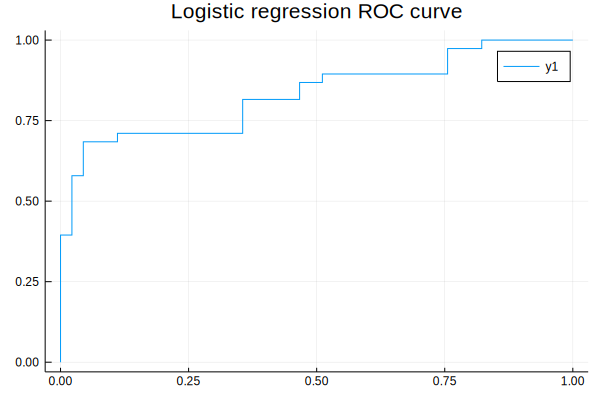

In [178]:
# Plot ROC curve
using Plots

Plots.plot(LRfpr, LRtpr)
title!("Logistic regression ROC curve")

**Comments on the ROC curve**

- We don't know how to interpret this curve, as it seems to jump in linear increments



# KNN

In [179]:
clf = machine(KNNClassifier(K=5), newdf, CAy)
MLJ.fit!(clf, rows=tr_inds)
y_pred= MLJ.predict(clf, rows=te_inds)

┌ Info: Training Machine{KNNClassifier,…} @225.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


81-element MLJBase.UnivariateFiniteVector{Multiclass{2}, Int64, UInt32, Float64}:
 UnivariateFinite{Multiclass{2}}(1=>0.4, 2=>0.6)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.2, 2=>0.8)
 UnivariateFinite{Multiclass{2}}(1=>0.8, 2=>0.2)
 UnivariateFinite{Multiclass{2}}(1=>0.4, 2=>0.6)
 UnivariateFinite{Multiclass{2}}(1=>0.2, 2=>0.8)
 UnivariateFinite{Multiclass{2}}(1=>0.4, 2=>0.6)
 UnivariateFinite{Multiclass{2}}(1=>0.4, 2=>0.6)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.6, 2=>0.4)
 UnivariateFinite{Multiclass{2}}(1=>0.2, 2=>0.8)
 UnivariateFinite{Multiclass{2}}(1=>0.0, 2=>1.0)
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 ⋮
 UnivariateFinite{Multiclass{2}}(1=>1.0, 2=>0.0)
 UnivariateFinite{Multiclass{2}}(1=>0.4, 2=>0.6)
 UnivariateFinite{Multiclass{2}}(1=>0.6, 2=>0.4)
 UnivariateFinite{Multiclass{2}}(1=>0.2, 2=>0.8)
 UnivariateFinite{Multiclass{2}}(1=>0.8, 2=>0.2)
 UnivariateFinite{Multiclass{2}}(

In [180]:
accuracy(mode.(y_pred), CAy[te_inds])

0.7407407407407407

# What is the best k degree

To get an idea of which k model works best at prediction, we will compare the prediction results of KNN models from degree k, 1:20

┌ Info: Training Machine{KNNClassifier,…} @140.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @214.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @932.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @699.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @011.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @041.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @744.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @837.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: 

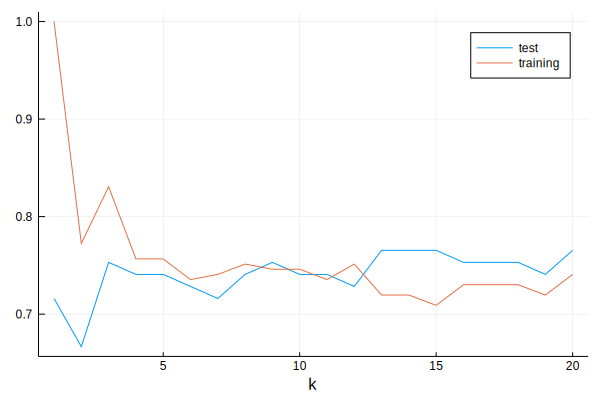

In [181]:
#import Pkg;
#Pkg.add("Plots")
using Plots
training_accuracy = []
testing_accuracy = []


for i in 1:20
    #println(i)
    
    knnc2 = KNNClassifier(K=i)
    knnc_mach2 = machine(knnc2, newdf, CAy)
    MLJ.fit!(knnc_mach2, rows=tr_inds)
    
    ypred_tr = predict_mode(knnc_mach2, rows=tr_inds)
    acc_tr= accuracy(ypred_tr, CAy[tr_inds])
    
    ypred_te = predict_mode(knnc_mach2, rows=te_inds)
    acc_te= accuracy(ypred_te, CAy[te_inds])
    
    #plot(k, accuracy(ypred, y[te_inds]) )
    #p = plot!(i, accuracy(ypred, y[te_inds]), label="Accuracy vs K")
    push!(training_accuracy, acc_tr)
    push!(testing_accuracy, acc_te) 
end


q = 1:20 # These are the plotting data
testing_accuracy
Plots.plot(q, testing_accuracy, label="test", xlabel="k")
Plots.plot!(q, training_accuracy, label="training", xlabel="k")

Results: It seems that the testing scores seem to plateau from around k = 3 onwards, with slight improvments along the way. k = 3, k = 9, k = 13 all seem like decent peaks.

┌ Info: Training Machine{KNNClassifier,…} @914.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


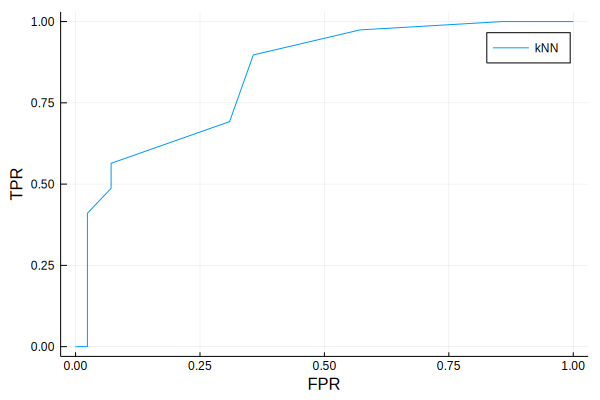

In [182]:
#Plotting the ROC-AUC curve for each model being iterated
clf = machine(KNNClassifier(K=9), newdf, CAy)
MLJ.fit!(clf, rows=tr_inds)
y_pred= MLJ.predict(clf, rows=te_inds)


fprs, tprs, thresholds = MLJ.roc(y_pred, CAy[te_inds])
Plots.plot(fprs, tprs, label="kNN", xlabel="FPR", ylabel="TPR")

From the ROC curve we can see that our model does better than random, but is not great. We will now calculate the auc value for the KNN degree 9 model:

In [183]:
auc_roc = auc(y_pred, y[te_inds])

0.8284493284493285

**Normalised kNN**

**Note that at this point we added the normalization method found just after analysing the variables, and use it from here on**

┌ Info: Training Machine{KNNClassifier,…} @570.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @896.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @913.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @856.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @632.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @569.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @822.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @423.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: 

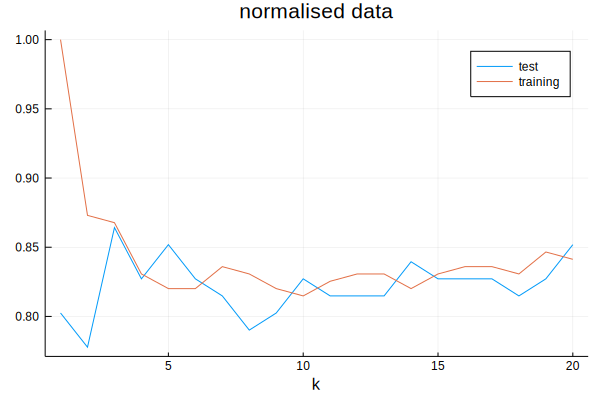

In [184]:
#import Pkg;
#Pkg.add("Plots")
using Plots
training_accuracy = []
testing_accuracy = []


for i in 1:20
    #println(i)
    
    knnc2 = KNNClassifier(K=i)
    knnc_mach2 = machine(knnc2, norm_data, CAy)
    MLJ.fit!(knnc_mach2, rows=tr_inds)
    
    ypred_tr = predict_mode(knnc_mach2, rows=tr_inds)
    acc_tr= accuracy(ypred_tr, CAy[tr_inds])
    
    ypred_te = predict_mode(knnc_mach2, rows=te_inds)
    acc_te= accuracy(ypred_te, CAy[te_inds])
    
    #plot(k, accuracy(ypred, y[te_inds]) )
    #p = plot!(i, accuracy(ypred, y[te_inds]), label="Accuracy vs K")
    push!(training_accuracy, acc_tr)
    push!(testing_accuracy, acc_te) 
end


q = 1:20 # These are the plotting data
testing_accuracy
Plots.plot(q, testing_accuracy, label="test", xlabel="k", title = "normalised data")
Plots.plot!(q, training_accuracy, label="training", xlabel="k")

**Observations**
- The best k values for the data are k=3 and k=5.
- At k=3 both the train and test performance are high, but we need to be aware that a high train may be an indicator of overfitting on the data by the model.
- At k=5 the train data is lower than at k=3 and so is the test but the lower train accuracy may mean that our model generalises better than at k=3.

┌ Info: Training Machine{KNNClassifier,…} @084.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


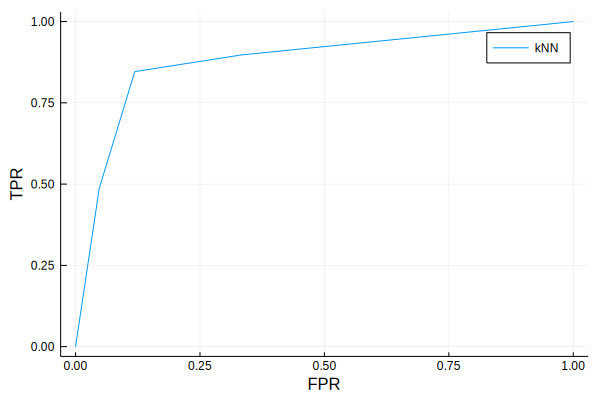

In [185]:
#Plotting the ROC-AUC curve for each model being iterated
clf = machine(KNNClassifier(K=3), norm_data, CAy)
MLJ.fit!(clf, rows=tr_inds)
y_pred= MLJ.predict(clf, rows=te_inds)


fprs, tprs, thresholds = MLJ.roc(y_pred, CAy[te_inds])
Plots.plot(fprs, tprs, label="kNN", xlabel="FPR", ylabel="TPR")

In [191]:
accuracy(mode.(y_pred), CAy[te_inds])

0.8641975308641976

In [79]:
auc_roc = auc(y_pred, y[te_inds])

0.8614163614163615

**Observation**
- Our normalized data used in the KNN classifier gives an AUC of 86 percent. This gives us an indication of how well our classifier performs over a range of thresholds. According to ScienceDirect.com, an AUC value of 80 percent to 90 percent is considered excellent, meaning our classifier is a good classifier.

**Non-normalized CV**

In [80]:
#cross validation
cv=CV(nfolds=10)
knn = KNNClassifier(K=9)
perf = evaluate(knn, newdf, CAy, resampling=cv, measure=auc, verbosity=0)

┌─────────────────────┬───────────────┬─────────────────────────────────────────
│ _.measure           │ _.measurement │ _.per_fold                             ⋯
├─────────────────────┼───────────────┼─────────────────────────────────────────
│ AreaUnderCurve @330 │ 0.768         │ [0.688, 0.736, 0.841, 0.742, 0.835, 0. ⋯
└─────────────────────┴───────────────┴─────────────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


**Normalised CV**

In [81]:
#cross validation
cv=CV(nfolds=10)
knn = KNNClassifier(K=9)
perf = evaluate(knn, norm_data, CAy, resampling=cv, measure=auc, verbosity=0)

┌─────────────────────┬───────────────┬─────────────────────────────────────────
│ _.measure           │ _.measurement │ _.per_fold                             ⋯
├─────────────────────┼───────────────┼─────────────────────────────────────────
│ AreaUnderCurve @330 │ 0.879         │ [0.841, 0.863, 0.829, 0.841, 0.918, 0. ⋯
└─────────────────────┴───────────────┴─────────────────────────────────────────
                                                                1 column omitted
_.per_observation = [missing]
_.fitted_params_per_fold = [ … ]
_.report_per_fold = [ … ]


**Observations**
- Our non-normalised data gives us an AUC of 76.8, but our normalised gives us an AUC of 87.9, which is considered to be very good.

## Random Forest

In [102]:
# train random forest classifier
data = Matrix(norm_newdf)[:, 1:end-1]
X1 = data
# using 2 random features, 10 trees, 0.5 portion of samples per tree, and a maximum tree depth of 6
model = DecisionTree.build_forest(y, X1, 2, 10, 0.5, 6)
# apply learned model
DecisionTree.apply_forest(model, X1[te_inds])
# get the probability of each label
DecisionTree.apply_forest_proba(model, X1[te_inds], [1, 2])
# run 3-fold cross validation for forests, using 2 random features per split
n_folds=3; n_subfeatures=2
accuracyVals = DecisionTree.nfoldCV_forest(y, X1, n_folds, n_subfeatures)

# set of classification parameters and respective default values
# n_subfeatures: number of features to consider at random per split (default: -1, sqrt(# features))
# n_trees: number of trees to train (default: 10)
# partial_sampling: fraction of samples to train each tree on (default: 0.7)
# max_depth: maximum depth of the decision trees (default: no maximum)
# min_samples_leaf: the minimum number of samples each leaf needs to have (default: 5)
# min_samples_split: the minimum number of samples in needed for a split (default: 2)
# min_purity_increase: minimum purity needed for a split (default: 0.0)
# keyword rng: the random number generator or seed to use (default Random.GLOBAL_RNG)
#              multi-threaded forests must be seeded with an `Int`
n_subfeatures=-1; n_trees=10; partial_sampling=0.7; max_depth=-1
min_samples_leaf=5; min_samples_split=2; min_purity_increase=0.0; seed=3

model    =   DecisionTree.build_forest(y, X1,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase;
                          rng = seed)

accuracyVals = DecisionTree.nfoldCV_forest(y, X1,
                          n_folds,
                          n_subfeatures,
                          n_trees,
                          partial_sampling,
                          max_depth,
                          min_samples_leaf,
                          min_samples_split,
                          min_purity_increase;
                          verbose = true,
                          rng = seed)


Fold 1
Classes:  

2×2 Matrix{Int64}:
 36  13
  9  32

[1, 2]
Matrix:   

2×2 Matrix{Int64}:
 42  11
  9  28

2×2 Matrix{Int64}:
 34  14
 16  26


Accuracy: 0.7555555555555555
Kappa:    0.5111111111111111

Fold 2
Classes:  [1, 2]
Matrix:   
Accuracy: 0.7777777777777778
Kappa:    0.5447647951441578

Fold 3
Classes:  [1, 2]
Matrix:   
Accuracy: 0.6666666666666666
Kappa:    0.3283582089552239

Mean Accuracy: 0.7333333333333333

2×2 Matrix{Int64}:
 31  22
  2  35

2×2 Matrix{Int64}:
 34  16
  9  31

2×2 Matrix{Int64}:
 38   9
 13  30



Fold 1
Classes:  [1, 2]
Matrix:   
Accuracy: 0.7333333333333333
Kappa:    0.49080622347949066

Fold 2
Classes:  [1, 2]
Matrix:   
Accuracy: 0.7222222222222222
Kappa:    0.4471744471744472

Fold 3
Classes:  [1, 2]
Matrix:   
Accuracy: 0.7555555555555555
Kappa:    0.5081967213114754

Mean Accuracy: 0.737037037037037


3-element Vector{Float64}:
 0.7333333333333333
 0.7222222222222222
 0.7555555555555555

# Bigger Dataset

**Now we will pull in the bigger dataset to test our best classifiers**
- SVM
- Logistic Regressor
- KNN



## Pull in dataset

In [103]:
cleveland = CSV.File("processed.cleveland.data"; header=0, delim=',')
cleveland_df = DataFrame(cleveland)
rename!(cleveland_df, :Column1 => :Age, :Column2 => :Sex, :Column3 => :ChestPainType, :Column4 => :RestingBloodPressure, :Column5 => :SerumCholesterol, :Column6 => :FastingBloodSugarGreaterThan12mg, :Column7 => :RestingElectrocardiographicResults, :Column8 => :MaximumHeartRateAchieved, :Column9 => :ExerciseInducedAngina, :Column10 => :OldPeak, :Column11 => :SlopeOfPeakExerciseSTSegment, :Column12 => :NumMajorVesselsColoredByFlouroscopy, :Column13 => :Thal, :Column14 => :HeartDiseaseStatus)
cleveland_df

,Age,Sex,ChestPainType,RestingBloodPressure,SerumCholesterol,FastingBloodSugarGreaterThan12mg
,Float64,Float64,Float64,Float64,Float64,Float64
1,63.0,1.0,1.0,145.0,233.0,1.0
2,67.0,1.0,4.0,160.0,286.0,0.0
3,67.0,1.0,4.0,120.0,229.0,0.0
4,37.0,1.0,3.0,130.0,250.0,0.0
5,41.0,0.0,2.0,130.0,204.0,0.0
6,56.0,1.0,2.0,120.0,236.0,0.0
7,62.0,0.0,4.0,140.0,268.0,0.0
8,57.0,0.0,4.0,120.0,354.0,0.0
9,63.0,1.0,4.0,130.0,254.0,0.0


**Data Imputation**
- We will first change the final column (absence or presence) to being either 0 or 1. Currently it is 0 = absence, 1 2 3 4 = presence.
- We will then check other columns for missing data.

In [104]:
for i in 1:303
    if cleveland_df[i,14] != 0
        cleveland_df[i, 14] = 1
    end
end

cleveland_df[14]

303-element Vector{Int64}:
 0
 1
 1
 0
 0
 0
 1
 0
 1
 1
 0
 0
 1
 ⋮
 0
 1
 1
 1
 0
 1
 1
 1
 1
 1
 1
 0

- Now we need to check the data for missing values. 
- We have 6 missing values in this dataset, all belonging to either Flouroscopy or thal. Our classifiers do not use flouroscopy at all, so we only need to change the thal values, of which there are 2. We will set these to be '3', which means normal (does not have thalassemia). This shouldn't be a huge issue, considering only 2 rows will be affected of 303.

In [105]:
#Check to see which values are missing

for i in 1:303
    if cleveland_df[i,13] == "?"
        println(i)
    end
end

# typeof(cleveland_df[1, 11])


88
267


- We find that only rows 88 and 267 have missing data for thal. We also note that columns 12 and 13 are both strings in this data set, so after replacing the missing data, we convert column 13 (12 isn't necessary ) to Float64.

In [106]:
#Replace missing values
for i in 1:303
    if cleveland_df[i,13] == "?"
        cleveland_df[i, 13] = "3.0"
    end
end

#Check to see if the data is still missing
for i in 1:303
    if cleveland_df[i,13] == "?"
        println(i)
    end
end



In [107]:
#Convert the column to Float64
cleveland_df.Thal = parse.(Float64, cleveland_df.Thal)

303-element Vector{Float64}:
 6.0
 3.0
 7.0
 3.0
 3.0
 3.0
 3.0
 3.0
 7.0
 7.0
 6.0
 3.0
 6.0
 ⋮
 3.0
 6.0
 7.0
 3.0
 3.0
 6.0
 7.0
 7.0
 7.0
 7.0
 3.0
 3.0

**Now we build our data frame to use the same columns as the ones we used for our classifiers**

In [108]:
transformer_instance = Standardizer()
transformer_model = machine(transformer_instance, cleveland_df)
MLJ.fit!(transformer_model)
norm_data = MLJ.transform(transformer_model, cleveland_df);


cleveland_norm_df = norm_data[:, ["Sex", "Age", "ChestPainType", "RestingElectrocardiographicResults", "MaximumHeartRateAchieved",
        "ExerciseInducedAngina", "OldPeak", "SlopeOfPeakExerciseSTSegment", "Thal"]]

cleveland_norm_ourData = (Sex=norm_data[:, :Sex], Age=norm_data[:, :Age], ChestPainType=norm_data[:, :ChestPainType], 
    RestingElectrocardiographicResults=norm_data[:, :RestingElectrocardiographicResults], 
    MaximumHeartRateAchieved=norm_data[:, :MaximumHeartRateAchieved], 
    ExerciseInducedAngina=norm_data[:, :ExerciseInducedAngina],
    OldPeak=norm_data[:, :OldPeak], SlopeOfPeakExerciseSTSegment=norm_data[:, :SlopeOfPeakExerciseSTSegment], 
    Thal=norm_data[:, :Thal])

┌ Info: Training Machine{Standardizer,…} @029.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


(Sex = [0.6850691552746564, 0.6850691552746564, 0.6850691552746564, 0.6850691552746564, -1.45488913388226, 0.6850691552746564, -1.45488913388226, -1.45488913388226, 0.6850691552746564, 0.6850691552746564  …  0.6850691552746564, -1.45488913388226, 0.6850691552746564, 0.6850691552746564, -1.45488913388226, 0.6850691552746564, 0.6850691552746564, 0.6850691552746564, -1.45488913388226, 0.6850691552746564],
 Age = [0.9471596223581399, 1.3897029771376563, 1.3897029771376563, -1.9293721837087168, -1.4868288289292004, 0.17270875149398618, 0.8365237836632607, 0.28334459018886526, 0.9471596223581399, -0.15919876459065113  …  0.9471596223581399, 0.9471596223581399, -1.4868288289292004, 0.5046162675786234, 0.28334459018886526, -1.0442854741496839, 1.5003388158325355, 0.28334459018886526, 0.28334459018886526, -1.8187363450138376],
 ChestPainType = [-2.2480556863574734, 0.8765354740384642, 0.8765354740384642, -0.1649949127601817, -1.2065252995588276, -1.2065252995588276, 0.8765354740384642, 0.876535

**We have normalized the data from the Cleveland dataset, now we can test our classifiers**

## SVM

In [109]:
#Get the new cleveland data and the y values as our ground truth
X1 = cleveland_norm_ourData
y = cleveland_df[14]
#Make a categorical Array
CAy = CategoricalArray(y)


#Partition the cleveland dataset
#Make the Training and the test indices
using Random
Random.seed!(1)
tr_inds, te_inds = partition(1:nrows(X1), 0.7, shuffle=true)


#Create the new model and subsequent machine

svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(5));
svc_mach = machine(svc_model, X1, CAy)
MLJ.fit!(svc_mach) #, rows=tr_inds, verbosity=0)
MLJ.predict(svc_mach, rows=te_inds)

println("Tr. accu.=", accuracy(MLJ.predict(svc_mach, rows=tr_inds), CAy[tr_inds]))
println("Te. accu.=", accuracy(MLJ.predict(svc_mach, rows=te_inds), CAy[te_inds]))

Tr. accu.=0.8867924528301887
Te. accu.=0.9120879120879121


┌ Info: Training Machine{SVC,…} @990.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


**Our SVM performs well on the bigger dataset too, with a testing accuracy of 91% We can also show this visually**

┌ Info: Training Machine{SVC,…} @400.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @260.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @137.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @470.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @359.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @439.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @815.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @747.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{SVC,…} @276.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\

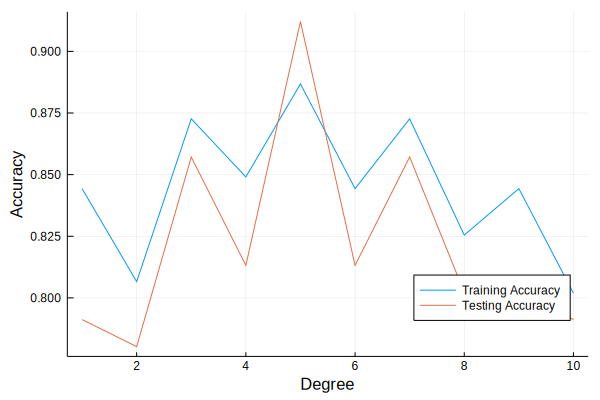

In [110]:
tr_acc = Float64[]
te_acc = Float64[]

for i = 1:10
    svc_model = SVC(kernel=LIBSVM.Kernel.Polynomial, degree=Int32(i));
    svc_mach = machine(svc_model, X1, CAy)
    MLJ.fit!(svc_mach) #, rows=tr_inds, verbosity=0)
#     println("Tr. accu.=", accuracy(predict_mode(mach, rows=tr_inds), y[tr_inds]))
#     println("Te. accu.=", accuracy(predict_mode(mach, rows=te_inds), y[te_inds]))
    ypred_tr = MLJ.predict(svc_mach, rows=tr_inds)
    ypred_te = MLJ.predict(svc_mach, rows=te_inds)
    
    push!(tr_acc, accuracy(ypred_tr, CAy[tr_inds]))
    push!(te_acc, accuracy(ypred_te, CAy[te_inds]))
end

Plots.plot(tr_acc, xlabel="Degree", ylabel="Accuracy", label="Training Accuracy")
Plots.plot!(te_acc, xlabel="Degree", ylabel="Accuracy", label="Testing Accuracy", legend=:bottomright)

## Logistic Regressor

In [111]:
#Copy all the code used in our Logistic regressor on the smaller dataset
using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(df,.70);

#converst y values to 0 and 1 for conformity to logistic regression
#import Pkg; Pkg.add("DataFrames")
using DataFrames

new_y = deepcopy(y)
df2 = DataFrame(New_y = new_y)
towtow = hcat(cleveland_norm_df, df2)
describe(towtow)

using Lathe.preprocess: TrainTestSplit
train, test = TrainTestSplit(towtow,.70);

# full variable regression: fm = @formula( New_y ~  Age + Sex + ChestPainType + RestingBloodPressure + SerumCholesterol + FastingBloodSugarGreaterThan12mg + RestingElectrocardiographicResults + MaximumHeartRateAchieved + ExerciseInducedAngina + OldPeak + SlopeOfPeakExerciseSTSegment + NumMajorVesselsColoredByFlouroscopy + Thal)
# fm = @formula( New_y ~  Age + ChestPainType + RestingBloodPressure + MaximumHeartRateAchieved + ExerciseInducedAngina + OldPeak + Thal) 82%
using GLM

fm = @formula( New_y ~  Sex + Age + ChestPainType + RestingElectrocardiographicResults + MaximumHeartRateAchieved +
        ExerciseInducedAngina + OldPeak + SlopeOfPeakExerciseSTSegment + Thal)
logit = glm(fm, train, Binomial(), ProbitLink())

StatsModels.TableRegressionModel{GeneralizedLinearModel{GLM.GlmResp{Vector{Float64}, Binomial{Float64}, ProbitLink}, GLM.DensePredChol{Float64, Cholesky{Float64, Matrix{Float64}}}}, Matrix{Float64}}

New_y ~ 1 + Sex + Age + ChestPainType + RestingElectrocardiographicResults + MaximumHeartRateAchieved + ExerciseInducedAngina + OldPeak + SlopeOfPeakExerciseSTSegment + Thal

Coefficients:
──────────────────────────────────────────────────────────────────────────────────────────────────
                                         Coef.  Std. Error      z  Pr(>|z|)   Lower 95%  Upper 95%
──────────────────────────────────────────────────────────────────────────────────────────────────
(Intercept)                         -0.104599     0.104692  -1.00    0.3177  -0.309791    0.100593
Sex                                  0.270236     0.11518    2.35    0.0190   0.0444875   0.495985
Age                                  0.208828     0.11509    1.81    0.0696  -0.0167452   0.434401
ChestPainType    

In [112]:
# Predict the target variable on test data 
prediction = MLBase.predict(logit,test)

#if above 0.5 - predictied as heart desies
prediction_class = [if x < 0.56 0 else 1 end for x in prediction]; # 0.55 - 0.65 gets a 5 % imporvment compared to 0.5. 
# Maybe beacuse there is a slightly higher proportion of negative to postive cases?

prediction_df = DataFrame(y_actual = test.New_y, y_predicted = prediction_class, prob_predicted = prediction);
prediction_df.correctly_classified = prediction_df.y_actual .== prediction_df.y_predicted
predAccuracy = mean(prediction_df.correctly_classified)



0.8666666666666667

In [113]:
# confusion_matrix = confusmat(2,prediction_df.y_actual, prediction_df.y_predicted)
confusion_matrix = MLBase.roc(prediction_df.y_actual, prediction_df.y_predicted)
confusion_matrix

ROCNums{Int64}
  p = 27
  n = 48
  tp = 20
  tn = 45
  fp = 3
  fn = 7


In [114]:
# This section aims to plot the ROC curve for the logistic regression. 
# The example code I am following can be found at: https://www.machinelearningplus.com/julia/logistic-regression-in-julia-practical-guide-with-examples/
#import Pkg; Pkg.add("Conda")

using Conda
Conda.add("scikit-learn")

@pyimport sklearn.metrics as sklm

LRfpr, LRtpr, LRthresholds = sklm.roc_curve(prediction_df.y_actual, prediction_df.prob_predicted)



┌ Info: Running `conda install -y scikit-learn` in root environment
└ @ Conda C:\Users\CMRL\.julia\packages\Conda\sNGum\src\Conda.jl:128


Solving environment: ...working... done

# All requested packages already installed.



([0.0, 0.0, 0.0, 0.020833333333333332, 0.020833333333333332, 0.041666666666666664, 0.041666666666666664, 0.0625, 0.0625, 0.14583333333333334, 0.14583333333333334, 0.20833333333333334, 0.20833333333333334, 0.25, 0.25, 0.2708333333333333, 0.2708333333333333, 0.6458333333333334, 0.6458333333333334, 1.0], [0.0, 0.037037037037037035, 0.5185185185185185, 0.5185185185185185, 0.6296296296296297, 0.6296296296296297, 0.7407407407407407, 0.7407407407407407, 0.8148148148148148, 0.8148148148148148, 0.8518518518518519, 0.8518518518518519, 0.8888888888888888, 0.8888888888888888, 0.9259259259259259, 0.9259259259259259, 0.9629629629629629, 0.9629629629629629, 1.0, 1.0], [1.9845595237165998, 0.9845595237165997, 0.7454936983208136, 0.7451694138801893, 0.7088549918504323, 0.678866168287745, 0.665344764669523, 0.6250224499944155, 0.5136489915181813, 0.4633595647429537, 0.46001690461603684, 0.39336372402338027, 0.36454199306658946, 0.31265033851857876, 0.30633195818256564, 0.29012870737920604, 0.26758963414

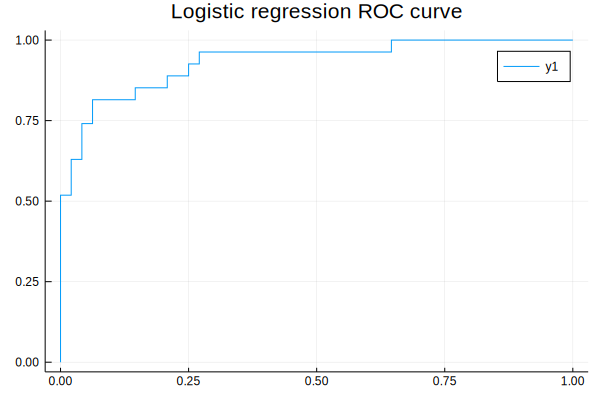

In [115]:
# Plot ROC curve
using Plots

Plots.plot(LRfpr, LRtpr)
title!("Logistic regression ROC curve")

**Comments**
- Here we get an accuracy of 86.67 which is ok. 

## KNN

In [116]:
clf = machine(KNNClassifier(K=5), cleveland_norm_df, CAy)
MLJ.fit!(clf, rows=tr_inds)
y_pred= MLJ.predict(clf, rows=te_inds)

┌ Info: Training Machine{KNNClassifier,…} @538.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


91-element MLJBase.UnivariateFiniteVector{Multiclass{2}, Int64, UInt32, Float64}:
 UnivariateFinite{Multiclass{2}}(0=>1.0, 1=>0.0)
 UnivariateFinite{Multiclass{2}}(0=>1.0, 1=>0.0)
 UnivariateFinite{Multiclass{2}}(0=>0.8, 1=>0.2)
 UnivariateFinite{Multiclass{2}}(0=>0.8, 1=>0.2)
 UnivariateFinite{Multiclass{2}}(0=>0.4, 1=>0.6)
 UnivariateFinite{Multiclass{2}}(0=>0.6, 1=>0.4)
 UnivariateFinite{Multiclass{2}}(0=>0.0, 1=>1.0)
 UnivariateFinite{Multiclass{2}}(0=>0.8, 1=>0.2)
 UnivariateFinite{Multiclass{2}}(0=>0.2, 1=>0.8)
 UnivariateFinite{Multiclass{2}}(0=>0.8, 1=>0.2)
 UnivariateFinite{Multiclass{2}}(0=>0.2, 1=>0.8)
 UnivariateFinite{Multiclass{2}}(0=>0.0, 1=>1.0)
 UnivariateFinite{Multiclass{2}}(0=>0.0, 1=>1.0)
 ⋮
 UnivariateFinite{Multiclass{2}}(0=>0.0, 1=>1.0)
 UnivariateFinite{Multiclass{2}}(0=>0.6, 1=>0.4)
 UnivariateFinite{Multiclass{2}}(0=>0.2, 1=>0.8)
 UnivariateFinite{Multiclass{2}}(0=>1.0, 1=>0.0)
 UnivariateFinite{Multiclass{2}}(0=>0.8, 1=>0.2)
 UnivariateFinite{Multiclass{2}}(

In [117]:
accuracy(mode.(y_pred), CAy[te_inds])

0.8241758241758241

┌ Info: Training Machine{KNNClassifier,…} @840.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @360.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @331.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @915.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @821.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @714.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @253.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: Training Machine{KNNClassifier,…} @906.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342
┌ Info: 

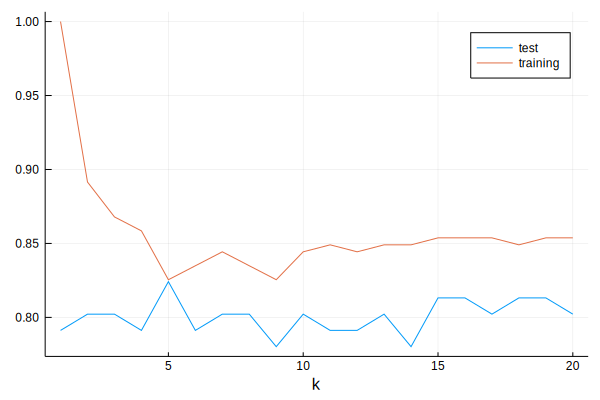

In [118]:
#import Pkg;
#Pkg.add("Plots")
using Plots
training_accuracy = []
testing_accuracy = []


for i in 1:20
    #println(i)
    
    knnc2 = KNNClassifier(K=i)
    knnc_mach2 = machine(knnc2, cleveland_norm_df, CAy)
    MLJ.fit!(knnc_mach2, rows=tr_inds)
    
    ypred_tr = predict_mode(knnc_mach2, rows=tr_inds)
    acc_tr= accuracy(ypred_tr, CAy[tr_inds])
    
    ypred_te = predict_mode(knnc_mach2, rows=te_inds)
    acc_te= accuracy(ypred_te, CAy[te_inds])
    
    #plot(k, accuracy(ypred, y[te_inds]) )
    #p = plot!(i, accuracy(ypred, y[te_inds]), label="Accuracy vs K")
    push!(training_accuracy, acc_tr)
    push!(testing_accuracy, acc_te) 
end


q = 1:20 # These are the plotting data
testing_accuracy
Plots.plot(q, testing_accuracy, label="test", xlabel="k")
Plots.plot!(q, training_accuracy, label="training", xlabel="k")

┌ Info: Training Machine{KNNClassifier,…} @081.
└ @ MLJBase C:\Users\CMRL\.julia\packages\MLJBase\hLtde\src\machines.jl:342


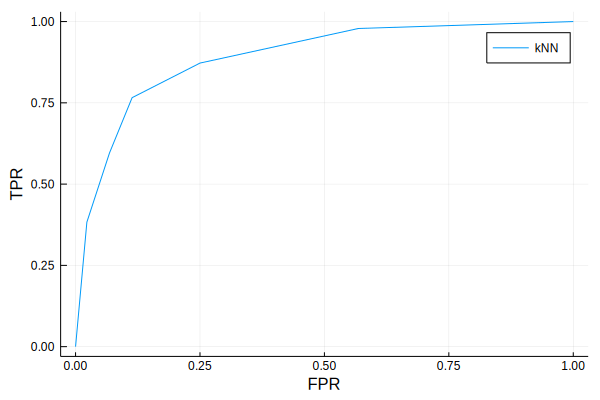

In [119]:
#Plotting the ROC-AUC curve for each model being iterated
clf = machine(KNNClassifier(K=5), cleveland_norm_df, CAy)
MLJ.fit!(clf, rows=tr_inds)
y_pred= MLJ.predict(clf, rows=te_inds)


fprs, tprs, thresholds = MLJ.roc(y_pred, CAy[te_inds])
Plots.plot(fprs, tprs, label="kNN", xlabel="FPR", ylabel="TPR")

In [120]:
auc_roc = auc(y_pred, y[te_inds])

0.8941005802707931

**Notes**
- We have an AUC of 89.41 which is considered by online sources to be outstanding.
- At K = 5 we have a testing accuracy of 82.4

## Marking criteria
This assessment is worth 15 marks. The following is a rough breakdown but may be subject to adjustment depending on what your
project exactly entails:
- Essential data manipulation and exploratory analysis: 2 marks
- Adequate modelling and performance evaluation: 3 marks
- Strong demonstration of skills with competitive outcome: 5 marks
- Clear documentation and concise, informative reporting: 5 marks

Up to 1 bonus marks may be awarded to submissions with exceptional quality in novelty and technical strength

## Submission
Prepare a private github repository that contains all raw data files,
and your Julia notebook(s) containing the full source code and processing results. Add necessary documentations. Write a separate
short report that summarizes the work and reflects on what you have
learned from this project.
Share your repo with “jddeng@ieee.org” so that I can access it
by Wednesday 6/10 11:59pm. No further commits to the repo are
allowed after the deadline.